# ANOVA Test
in this experiment we will performing several test which;
- ANOVA Table
- Shapiro-Wilk test
- Tukey HSD
- Bartlett’s test
- Levene’s test

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/faulty_training.csv')

In [3]:
# remove the second and third index column 
data_prcs = data.drop(['simulationRun', 'sample'], axis=1)

In [4]:
# check the data
data_prcs.head()

,faultNumber,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [5]:
data_prcs.columns

Index(['faultNumber', 'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5',
       'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11',
       'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17',
       'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23',
       'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29',
       'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35',
       'xmeas_36', 'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41',
       'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8',
       'xmv_9', 'xmv_10', 'xmv_11'],
      dtype='object')

## ANOVA Table
The ANOVA table represents between- and within-group sources of variation, and their associated degree of freedoms, the sum of squares (SS), and mean squares (MS). The total variation is the sum of between- and within-group variances. The F value is a ratio of between- and within-group mean squares (MS). p value is estimated from F value and degree of freedoms.

In [6]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
# Ordinary Least Squares (OLS) model
## XMEAS_1
model = ols('xmeas_1 ~ C(faultNumber)', data=data_prcs).fit()
anova_table = sm.stats.anova_lm(model, typ=2) # type 1,2,3
anova_table

,sum_sq,df,F,PR(>F)
C(faultNumber),12080.939644,19.0,85189.822332,0.0
Residual,6008.194065,804979.0,NaN,NaN


In [8]:
import scipy.stats as stats
# Shapiro-Wilk test
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_1')
print(w, pvalue)

Shapiro-Wilk xmeas_1
0.839401125907898 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [9]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
# i think i prefer the bioinfokit since it has more information
# about mean square
res = stat()

In [10]:
## XMEAS_1
res.anova_stat(df=data_prcs, res_var='xmeas_1', anova_model='xmeas_1 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,12080.939644,635.838929,85189.822332,0.0
Residual,804979.0,6008.194065,0.007464,NaN,NaN


In [11]:
## XMEAS_2
# model = ols('xmeas_2 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_2', anova_model='xmeas_2 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,1.322277e+08,6.959353e+06,4043.639883,0.0
Residual,804979.0,1.385418e+09,1.721062e+03,NaN,NaN


In [12]:
# Shapiro-Wilk test
model = ols('xmeas_2 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_2')
print(w, pvalue)

Shapiro-Wilk xmeas_2
0.9888626933097839 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
## XMEAS_3
# model = ols('xmeas_3 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_3', anova_model='xmeas_3 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,2.750442e+09,1.447601e+08,16143.970676,0.0
Residual,804979.0,7.218104e+09,8.966823e+03,NaN,NaN


In [14]:
# Shapiro-Wilk test
model = ols('xmeas_3 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_3')
print(w, pvalue)

Shapiro-Wilk xmeas_3
0.8715271949768066 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
## XMEAS_4
# model = ols('xmeas_4 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_4', anova_model='xmeas_4 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,27837.262947,1465.119102,14623.980602,0.0
Residual,804979.0,80647.680141,0.100186,NaN,NaN


In [16]:
# Shapiro-Wilk test
model = ols('xmeas_4 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_4')
print(w, pvalue)

Shapiro-Wilk xmeas_4
0.7506324648857117 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
## XMEAS_5
# model = ols('xmeas_5 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_5', anova_model='xmeas_5 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,9.026372,0.475072,8.867172,5.684912e-26
Residual,804979.0,43127.974312,0.053577,NaN,NaN


In [18]:
# Shapiro-Wilk test
model = ols('xmeas_5 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_5')
print(w, pvalue)

Shapiro-Wilk xmeas_5
0.9899103045463562 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [19]:
## XMEAS_6
# model = ols('xmeas_6 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_6', anova_model='xmeas_6 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,8429.279096,443.646268,4852.386165,0.0
Residual,804979.0,73598.002547,0.091428,NaN,NaN


In [20]:
# Shapiro-Wilk test
model = ols('xmeas_6 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_6')
print(w, pvalue)

Shapiro-Wilk xmeas_6
0.9600516557693481 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [21]:
## XMEAS_7
# model = ols('xmeas_7 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_7', anova_model='xmeas_7 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,2.491707e+09,1.311425e+08,48437.0965,0.0
Residual,804979.0,2.179465e+09,2.707481e+03,NaN,NaN


In [22]:
# Shapiro-Wilk test
model = ols('xmeas_7 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_7')
print(w, pvalue)

Shapiro-Wilk xmeas_7
0.7539106607437134 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
## XMEAS_8
# model = ols('xmeas_8 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_8', anova_model='xmeas_8 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,9.655705e+04,5081.949788,2977.251632,0.0
Residual,804979.0,1.374040e+06,1.706927,NaN,NaN


In [24]:
# Shapiro-Wilk test
model = ols('xmeas_8 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_8')
print(w, pvalue)

Shapiro-Wilk xmeas_8
0.836280107498169 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
## XMEAS_9
# model = ols('xmeas_9 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_9', anova_model='xmeas_9 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,0.256452,0.013497,2.55003,0.000221
Residual,804979.0,4260.797050,0.005293,NaN,NaN


In [26]:
# Shapiro-Wilk test
model = ols('xmeas_9 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_9')
print(w, pvalue)

Shapiro-Wilk xmeas_9
0.650867760181427 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [27]:
## XMEAS_10
# model = ols('xmeas_10 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_10', anova_model='xmeas_10 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,4765.726405,250.827706,165879.160483,0.0
Residual,804979.0,1217.217612,0.001512,NaN,NaN


In [28]:
# Shapiro-Wilk test
model = ols('xmeas_10 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_10')
print(w, pvalue)

Shapiro-Wilk xmeas_10
0.756109356880188 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [29]:
## XMEAS_11
# model = ols('xmeas_11 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_11', anova_model='xmeas_11 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,1.377882e+06,72520.121854,47594.504593,0.0
Residual,804979.0,1.226553e+06,1.523708,NaN,NaN


In [30]:
# Shapiro-Wilk test
model = ols('xmeas_11 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_11')
print(w, pvalue)

Shapiro-Wilk xmeas_11
0.8052719831466675 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
## XMEAS_12
# model = ols('xmeas_12 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_12', anova_model='xmeas_12 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,6227.348863,327.755203,331.692077,0.0
Residual,804979.0,795424.655403,0.988131,NaN,NaN


In [32]:
# Shapiro-Wilk test
model = ols('xmeas_12 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_12')
print(w, pvalue)

Shapiro-Wilk xmeas_12
0.9998980164527893 2.0338472225822635e-11


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
## XMEAS_13
# model = ols('xmeas_13 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_13', anova_model='xmeas_13 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,2.417656e+09,1.272451e+08,44019.617548,0.0
Residual,804979.0,2.326908e+09,2.890645e+03,NaN,NaN


In [34]:
# Shapiro-Wilk test
model = ols('xmeas_13 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_13')
print(w, pvalue)

Shapiro-Wilk xmeas_13
0.7588751316070557 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [35]:
## XMEAS_14
# model = ols('xmeas_14 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_14', anova_model='xmeas_14 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,22404.580613,1179.188453,995.220249,0.0
Residual,804979.0,953780.776850,1.184852,NaN,NaN


In [36]:
# Shapiro-Wilk test
model = ols('xmeas_14 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_14')
print(w, pvalue)

Shapiro-Wilk xmeas_14
0.9984253644943237 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [37]:
## XMEAS_15
# model = ols('xmeas_15 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_15', anova_model='xmeas_15 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,8047.595401,423.557653,408.909165,0.0
Residual,804979.0,833816.028031,1.035823,NaN,NaN


In [38]:
# Shapiro-Wilk test
model = ols('xmeas_15 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_15')
print(w, pvalue)

Shapiro-Wilk xmeas_15
0.9998292326927185 3.6196835976213333e-16


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [39]:
## XMEAS_16
# model = ols('xmeas_16 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_16', anova_model='xmeas_16 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,3.230235e+09,1.700124e+08,76390.65536,0.0
Residual,804979.0,1.791533e+09,2.225565e+03,NaN,NaN


In [40]:
# Shapiro-Wilk test
model = ols('xmeas_16 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_16')
print(w, pvalue)

Shapiro-Wilk xmeas_16
0.7494990825653076 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [41]:
## XMEAS_17
# model = ols('xmeas_17 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_17', anova_model='xmeas_17 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,2414.795526,127.094501,304.515132,0.0
Residual,804979.0,335971.496921,0.417367,NaN,NaN


In [42]:
# Shapiro-Wilk test
model = ols('xmeas_17 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_17')
print(w, pvalue)

Shapiro-Wilk xmeas_17
0.9994819164276123 1.6327086149870482e-29


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [43]:
## XMEAS_18
# model = ols('xmeas_18 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_18', anova_model='xmeas_18 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,5.851188e+05,30795.725816,11391.773329,0.0
Residual,804979.0,2.176124e+06,2.703330,NaN,NaN


In [44]:
# Shapiro-Wilk test
model = ols('xmeas_18 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_18')
print(w, pvalue)

Shapiro-Wilk xmeas_18
0.8456660509109497 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [45]:
## XMEAS_19
# model = ols('xmeas_19 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_19', anova_model='xmeas_19 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,1.829456e+09,9.628714e+07,38096.828631,0.0
Residual,804979.0,2.034530e+09,2.527432e+03,NaN,NaN


In [46]:
# Shapiro-Wilk test
model = ols('xmeas_19 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_19')
print(w, pvalue)

Shapiro-Wilk xmeas_19
0.8518306016921997 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [47]:
## XMEAS_20
# model = ols('xmeas_20 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_20', anova_model='xmeas_20 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,4.159790e+07,2.189363e+06,28892.267606,0.0
Residual,804979.0,6.099872e+07,7.577679e+01,NaN,NaN


In [48]:
# Shapiro-Wilk test
model = ols('xmeas_20 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_20')
print(w, pvalue)

Shapiro-Wilk xmeas_20
0.7634943127632141 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [49]:
## XMEAS_21
# model = ols('xmeas_21 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_21', anova_model='xmeas_21 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,529684.839837,27878.149465,27190.503214,0.0
Residual,804979.0,825336.872277,1.025290,NaN,NaN


In [50]:
# Shapiro-Wilk test
model = ols('xmeas_21 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_21')
print(w, pvalue)

Shapiro-Wilk xmeas_21
0.6115650534629822 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [51]:
## XMEAS_22
# model = ols('xmeas_22 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_22', anova_model='xmeas_22 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,877456.058697,46181.897826,47626.252814,0.0
Residual,804979.0,780566.509728,0.969673,NaN,NaN


In [52]:
# Shapiro-Wilk test
model = ols('xmeas_22 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_22')
print(w, pvalue)

Shapiro-Wilk xmeas_22
0.7413930892944336 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [53]:
## XMEAS_23
# model = ols('xmeas_23 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_23', anova_model='xmeas_23 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,1.806097e+06,95057.754454,101233.808676,0.0
Residual,804979.0,7.558690e+05,0.938992,NaN,NaN


In [54]:
# Shapiro-Wilk test
model = ols('xmeas_23 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_23')
print(w, pvalue)

Shapiro-Wilk xmeas_23
0.7993712425231934 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [55]:
## XMEAS_24
# model = ols('xmeas_24 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_24', anova_model='xmeas_24 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,6226.731090,327.722689,7577.514677,0.0
Residual,804979.0,34814.829622,0.043249,NaN,NaN


In [56]:
# Shapiro-Wilk test
model = ols('xmeas_24 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_24')
print(w, pvalue)

Shapiro-Wilk xmeas_24
0.9188098907470703 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [57]:
## XMEAS_25
# model = ols('xmeas_25 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_25', anova_model='xmeas_25 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,2.219078e+06,116793.553189,103357.713825,0.0
Residual,804979.0,9.096211e+05,1.129994,NaN,NaN


In [58]:
# Shapiro-Wilk test
model = ols('xmeas_25 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_25')
print(w, pvalue)

Shapiro-Wilk xmeas_25
0.7932429313659668 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [59]:
## XMEAS_26
# model = ols('xmeas_26 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_26', anova_model='xmeas_26 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,711.674903,37.456574,2182.271519,0.0
Residual,804979.0,13816.683719,0.017164,NaN,NaN


In [60]:
# Shapiro-Wilk test
model = ols('xmeas_26 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_26')
print(w, pvalue)

Shapiro-Wilk xmeas_26
0.9871703386306763 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [61]:
## XMEAS_27
# model = ols('xmeas_27 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_27', anova_model='xmeas_27 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,98372.762573,5177.513820,6492.554879,0.0
Residual,804979.0,641933.718652,0.797454,NaN,NaN


In [62]:
# Shapiro-Wilk test
model = ols('xmeas_27 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_27')
print(w, pvalue)

Shapiro-Wilk xmeas_27
0.781231164932251 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [63]:
## XMEAS_28
# model = ols('xmeas_28 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_28', anova_model='xmeas_28 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,9207.681977,484.614841,98933.869288,0.0
Residual,804979.0,3943.086153,0.004898,NaN,NaN


In [64]:
# Shapiro-Wilk test
model = ols('xmeas_28 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_28')
print(w, pvalue)

Shapiro-Wilk xmeas_28
0.7931214570999146 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [65]:
## XMEAS_29
# model = ols('xmeas_29 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_29', anova_model='xmeas_29 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,4.078808e+06,214674.089615,101400.411599,0.0
Residual,804979.0,1.704215e+06,2.117093,NaN,NaN


In [66]:
# Shapiro-Wilk test
model = ols('xmeas_29 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_29')
print(w, pvalue)

Shapiro-Wilk xmeas_29
0.7691571116447449 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [67]:
## XMEAS_30
# model = ols('xmeas_30 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_30', anova_model='xmeas_30 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,10974.767258,577.619329,7994.335139,0.0
Residual,804979.0,58162.614162,0.072254,NaN,NaN


In [68]:
# Shapiro-Wilk test
model = ols('xmeas_30 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_30')
print(w, pvalue)

Shapiro-Wilk xmeas_30
0.8910706639289856 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [69]:
## XMEAS_31
# model = ols('xmeas_31 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_31', anova_model='xmeas_31 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,5.400915e+06,284258.703083,113272.668828,0.0
Residual,804979.0,2.020101e+06,2.509508,NaN,NaN


In [70]:
# Shapiro-Wilk test
model = ols('xmeas_31 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_31')
print(w, pvalue)

Shapiro-Wilk xmeas_31
0.7595211267471313 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [71]:
## XMEAS_32
# model = ols('xmeas_32 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_32', anova_model='xmeas_32 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,1209.436814,63.654569,3162.401969,0.0
Residual,804979.0,16203.060816,0.020129,NaN,NaN


In [72]:
# Shapiro-Wilk test
model = ols('xmeas_32 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_32')
print(w, pvalue)

Shapiro-Wilk xmeas_32
0.9634156823158264 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [73]:
## XMEAS_33
# model = ols('xmeas_33 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_33', anova_model='xmeas_33 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,1.854860e+05,9762.419289,6183.500205,0.0
Residual,804979.0,1.270889e+06,1.578785,NaN,NaN


In [74]:
# Shapiro-Wilk test
model = ols('xmeas_33 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_33')
print(w, pvalue)

Shapiro-Wilk xmeas_33
0.7481096982955933 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [75]:
## XMEAS_34
# model = ols('xmeas_34 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_34', anova_model='xmeas_34 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,17377.678358,914.614650,102827.248677,0.0
Residual,804979.0,7160.024178,0.008895,NaN,NaN


In [76]:
# Shapiro-Wilk test
model = ols('xmeas_34 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_34')
print(w, pvalue)

Shapiro-Wilk xmeas_34
0.7729253768920898 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [77]:
## XMEAS_35
# model = ols('xmeas_35 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_35', anova_model='xmeas_35 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,51263.031310,2698.054279,46506.829076,0.0
Residual,804979.0,46700.174555,0.058014,NaN,NaN


In [78]:
# Shapiro-Wilk test
model = ols('xmeas_35 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_35')
print(w, pvalue)

Shapiro-Wilk xmeas_35
0.838140606880188 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [79]:
## XMEAS_36
# model = ols('xmeas_36 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_36', anova_model='xmeas_36 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,14946.327344,786.648808,48990.033096,0.0
Residual,804979.0,12925.808179,0.016057,NaN,NaN


In [80]:
# Shapiro-Wilk test
model = ols('xmeas_36 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_36')
print(w, pvalue)

Shapiro-Wilk xmeas_36
0.8951488733291626 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [81]:
## XMEAS_37
# model = ols('xmeas_37 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_37', anova_model='xmeas_37 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,0.889311,0.046806,460.795951,0.0
Residual,804979.0,81.766608,0.000102,NaN,NaN


In [82]:
# Shapiro-Wilk test
model = ols('xmeas_37 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_37')
print(w, pvalue)

Shapiro-Wilk xmeas_37
1.0001673698425293 1.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [83]:
## XMEAS_38
# model = ols('xmeas_38 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_38', anova_model='xmeas_38 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,1682.001507,88.526395,13820.123028,0.0
Residual,804979.0,5156.386006,0.006406,NaN,NaN


In [84]:
# Shapiro-Wilk test
model = ols('xmeas_38 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_38')
print(w, pvalue)

Shapiro-Wilk xmeas_38
0.7924678325653076 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [85]:
## XMEAS_39
# model = ols('xmeas_39 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_39', anova_model='xmeas_39 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,30.821617,1.622190,11261.165661,0.0
Residual,804979.0,115.958615,0.000144,NaN,NaN


In [86]:
# Shapiro-Wilk test
model = ols('xmeas_39 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_39')
print(w, pvalue)

Shapiro-Wilk xmeas_39
0.9967219233512878 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [87]:
## XMEAS_40
# model = ols('xmeas_40 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_40', anova_model='xmeas_40 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,23606.563262,1242.450698,4026.018029,0.0
Residual,804979.0,248420.825020,0.308605,NaN,NaN


In [88]:
# Shapiro-Wilk test
model = ols('xmeas_40 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_40')
print(w, pvalue)

Shapiro-Wilk xmeas_40
0.9983367919921875 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [89]:
## XMEAS_41
# model = ols('xmeas_41 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmeas_41', anova_model='xmeas_41 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,38005.998685,2000.315720,6063.683134,0.0
Residual,804979.0,265550.180102,0.329885,NaN,NaN


In [90]:
# Shapiro-Wilk test
model = ols('xmeas_41 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmeas_41')
print(w, pvalue)

Shapiro-Wilk xmeas_41
0.9977471232414246 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [91]:
## XMV_1
# model = ols('xmv_1 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_1', anova_model='xmv_1 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,1.734438e+06,91286.212084,10622.981991,0.0
Residual,804979.0,6.917406e+06,8.593276,NaN,NaN


In [92]:
# Shapiro-Wilk test
model = ols('xmv_1 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_1')
print(w, pvalue)

Shapiro-Wilk xmv_1
0.45105791091918945 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [93]:
## XMV_2
# model = ols('xmv_2 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_2', anova_model='xmv_2 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,6.101316e+06,321121.917778,16254.551865,0.0
Residual,804979.0,1.590302e+07,19.755815,NaN,NaN


In [94]:
# Shapiro-Wilk test
model = ols('xmv_2 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_2')
print(w, pvalue)

Shapiro-Wilk xmv_2
0.4344733953475952 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [95]:
## XMV_3
# model = ols('xmv_3 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_3', anova_model='xmv_3 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,2.712811e+08,1.427795e+07,168979.96839,0.0
Residual,804979.0,6.801666e+07,8.449495e+01,NaN,NaN


In [96]:
# Shapiro-Wilk test
model = ols('xmv_3 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_3')
print(w, pvalue)

Shapiro-Wilk xmv_3
0.809900164604187 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [97]:
## XMV_4
# model = ols('xmv_4 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_4', anova_model='xmv_4 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,2.122514e+07,1.117113e+06,39921.350021,0.0
Residual,804979.0,2.252560e+07,2.798284e+01,NaN,NaN


In [98]:
# Shapiro-Wilk test
model = ols('xmv_4 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_4')
print(w, pvalue)

Shapiro-Wilk xmv_4
0.6640080809593201 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [99]:
## XMV_5
# model = ols('xmv_5 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_5', anova_model='xmv_5 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,5.232956e+06,275418.734457,2343.769296,0.0
Residual,804979.0,9.459391e+07,117.511026,NaN,NaN


In [100]:
# Shapiro-Wilk test
model = ols('xmv_5 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_5')
print(w, pvalue)

Shapiro-Wilk xmv_5
0.425109326839447 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [101]:
## XMV_6
# model = ols('xmv_6 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_6', anova_model='xmv_6 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,9.647383e+07,5.077570e+06,104148.991397,0.0
Residual,804979.0,3.924510e+07,4.875295e+01,NaN,NaN


In [102]:
# Shapiro-Wilk test
model = ols('xmv_6 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_6')
print(w, pvalue)

Shapiro-Wilk xmv_6
0.7830014228820801 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [103]:
## XMV_7
# model = ols('xmv_7 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_7', anova_model='xmv_7 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,5.393335e+04,2838.597446,331.704118,0.0
Residual,804979.0,6.888704e+06,8.557619,NaN,NaN


In [104]:
# Shapiro-Wilk test
model = ols('xmv_7 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_7')
print(w, pvalue)

Shapiro-Wilk xmv_7
0.999918520450592 1.2282839190191908e-09


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [105]:
## XMV_8
# model = ols('xmv_8 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_8', anova_model='xmv_8 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,4.309857e+04,2268.345603,408.874102,0.0
Residual,804979.0,4.465850e+06,5.547785,NaN,NaN


In [106]:
# Shapiro-Wilk test
model = ols('xmv_8 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_8')
print(w, pvalue)

Shapiro-Wilk xmv_8
0.9998151659965515 5.607662513288888e-17


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [107]:
## XMV_9
# model = ols('xmv_9 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_9', anova_model='xmv_9 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,1.003706e+08,5.282663e+06,28793.620554,0.0
Residual,804979.0,1.476866e+08,1.834664e+02,NaN,NaN


In [108]:
# Shapiro-Wilk test
model = ols('xmv_9 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_9')
print(w, pvalue)

Shapiro-Wilk xmv_9
0.8328434824943542 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [109]:
## XMV_10
# model = ols('xmv_10 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_10', anova_model='xmv_10 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,4.438375e+06,233598.696699,2385.455884,0.0
Residual,804979.0,7.882856e+07,97.926228,NaN,NaN


In [110]:
# Shapiro-Wilk test
model = ols('xmv_10 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_10')
print(w, pvalue)

Shapiro-Wilk xmv_10
0.45011812448501587 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [111]:
## XMV_11
# model = ols('xmv_11 ~ C(faultNumber)', data=data_prcs).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

res.anova_stat(df=data_prcs, res_var='xmv_11', anova_model='xmv_11 ~ C(faultNumber)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(faultNumber),19.0,4.010239e+06,211065.210735,10239.978138,0.0
Residual,804979.0,1.659213e+07,20.611881,NaN,NaN


In [112]:
# Shapiro-Wilk test
model = ols('xmv_11 ~ C(faultNumber)', data=data_prcs).fit()
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk xmv_11')
print(w, pvalue)

Shapiro-Wilk xmv_11
0.532839298248291 0.0


C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Tukey HSD
From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

In [113]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()

In [114]:
# xmeas_1
res.tukey_hsd(df=data_prcs, res_var='xmeas_1', xfac_var='faultNumber', anova_model='xmeas_1 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.458272,0.456121,0.460424,1067.509019,0.001
1,1,3,0.487470,0.485319,0.489622,1135.523164,0.001
2,1,4,0.487471,0.485319,0.489622,1135.524157,0.001
3,1,5,0.487476,0.485324,0.489627,1135.536152,0.001
4,1,6,0.727945,0.725793,0.730097,1695.689730,0.001
...,...,...,...,...,...,...,...
185,17,19,0.000070,-0.002095,0.002235,0.162455,0.900
186,17,20,0.000029,-0.002136,0.002194,0.067919,0.900
187,18,19,0.066203,0.064038,0.068368,153.260152,0.001
188,18,20,0.066244,0.064079,0.068409,153.354688,0.001


In [115]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

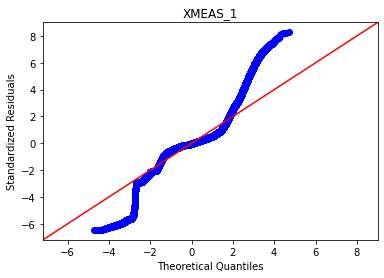

In [116]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_1')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

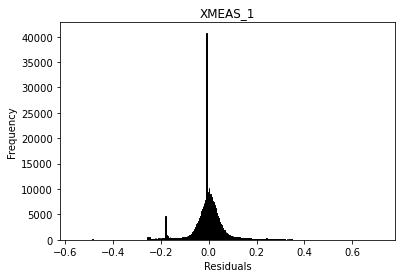

In [117]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_1')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [118]:
# xmeas_2
res.tukey_hsd(df=data_prcs, res_var='xmeas_2', xfac_var='faultNumber', anova_model='xmeas_2 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,36.099706,35.066524,37.132889,175.118880,0.001
1,1,3,6.227173,5.193990,7.260355,30.207878,0.001
2,1,4,6.231015,5.197832,7.264197,30.226516,0.001
3,1,5,3.193625,2.160442,4.226807,15.492203,0.001
4,1,6,33.608380,32.575198,34.641563,163.033513,0.001
...,...,...,...,...,...,...,...
185,17,19,0.247182,-0.792437,1.286802,1.191652,0.900
186,17,20,0.201973,-0.837647,1.241592,0.973697,0.900
187,18,19,27.066773,26.027153,28.106392,130.487305,0.001
188,18,20,27.515928,26.476308,28.555547,132.652655,0.001


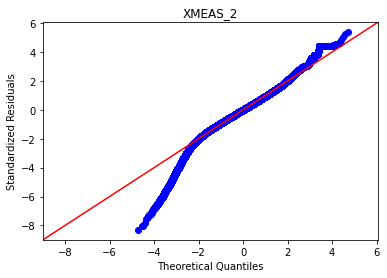

In [119]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_2')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

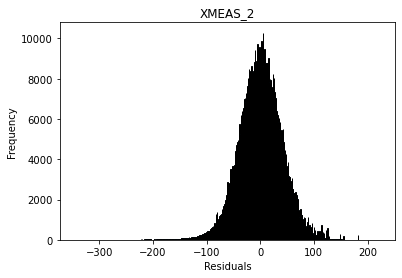

In [120]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_2')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [121]:
# xmeas_3
res.tukey_hsd(df=data_prcs, res_var='xmeas_3', xfac_var='faultNumber', anova_model='xmeas_3 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,159.122546,156.764250,161.480841,338.173777,0.001
1,1,3,24.189267,21.830971,26.547562,51.408024,0.001
2,1,4,24.214057,21.855762,26.572352,51.460709,0.001
3,1,5,15.488230,13.129934,17.846525,32.916223,0.001
4,1,6,188.185822,185.827527,190.544117,399.940248,0.001
...,...,...,...,...,...,...,...
185,17,19,0.317648,-2.055341,2.690636,0.670897,0.900
186,17,20,0.607352,-1.765636,2.980341,1.282778,0.900
187,18,19,63.963772,61.590784,66.336761,135.096707,0.001
188,18,20,63.038772,60.665784,65.411761,133.143032,0.001


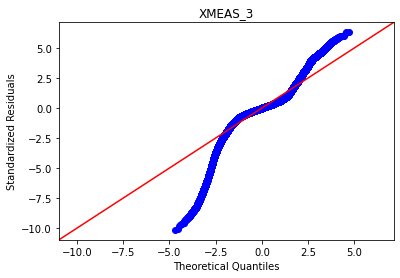

In [122]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_3')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

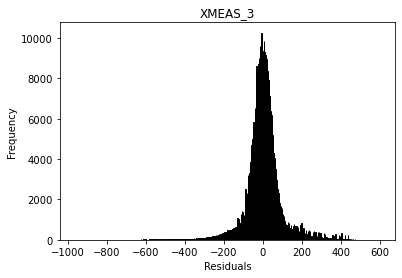

In [123]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_3')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [124]:
# xmeas_4
res.tukey_hsd(df=data_prcs, res_var='xmeas_4', xfac_var='faultNumber', anova_model='xmeas_4 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.783504,0.775621,0.791387,498.155660,0.001
1,1,3,0.529331,0.521448,0.537214,336.551403,0.001
2,1,4,0.529355,0.521472,0.537238,336.566607,0.001
3,1,5,0.516020,0.508137,0.523902,328.087711,0.001
4,1,6,0.764699,0.756816,0.772582,486.199507,0.001
...,...,...,...,...,...,...,...
185,17,19,0.000202,-0.007730,0.008134,0.127830,0.900
186,17,20,0.000405,-0.007527,0.008337,0.255684,0.900
187,18,19,0.549080,0.541148,0.557012,346.945887,0.001
188,18,20,0.548877,0.540945,0.556809,346.818033,0.001


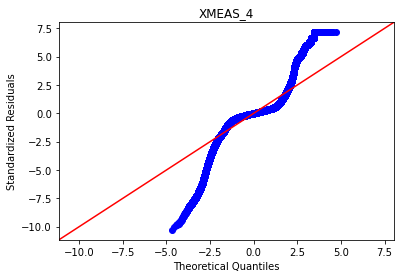

In [125]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_4')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

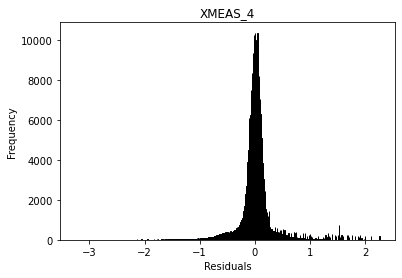

In [126]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_4')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [127]:
# xmeas_5
res.tukey_hsd(df=data_prcs, res_var='xmeas_5', xfac_var='faultNumber', anova_model='xmeas_5 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.000020,-0.005744,0.005785,0.017646,0.900000
1,1,3,0.000030,-0.005734,0.005795,0.026191,0.900000
2,1,4,0.000035,-0.005729,0.005800,0.030828,0.900000
3,1,5,0.000048,-0.005717,0.005812,0.041561,0.900000
4,1,6,0.014054,0.008290,0.019819,12.219557,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.002945,-0.002855,0.008746,2.544758,0.900000
186,17,20,0.001469,-0.004331,0.007270,1.269366,0.900000
187,18,19,0.001611,-0.004189,0.007412,1.392299,0.900000
188,18,20,0.002803,-0.002998,0.008603,2.421824,0.900000


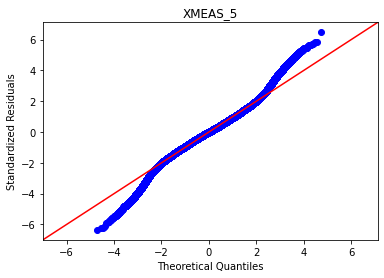

In [128]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_5')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

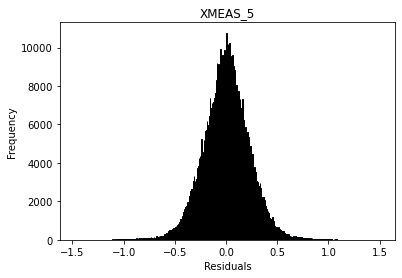

In [129]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_5')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [130]:
# xmeas_6
res.tukey_hsd(df=data_prcs, res_var='xmeas_6', xfac_var='faultNumber', anova_model='xmeas_6 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.354435,0.346904,0.361965,235.897232,0.001000
1,1,3,0.047119,0.039588,0.054649,31.360202,0.001000
2,1,4,0.047023,0.039493,0.054554,31.296785,0.001000
3,1,5,0.023434,0.015904,0.030965,15.596997,0.001000
4,1,6,0.000491,-0.007039,0.008021,0.326831,0.900000
...,...,...,...,...,...,...,...
185,17,19,0.002151,-0.005426,0.009729,1.422869,0.900000
186,17,20,0.002261,-0.005316,0.009839,1.495710,0.900000
187,18,19,0.351824,0.344247,0.359401,232.709891,0.001000
188,18,20,0.356237,0.348659,0.363814,235.628470,0.001000


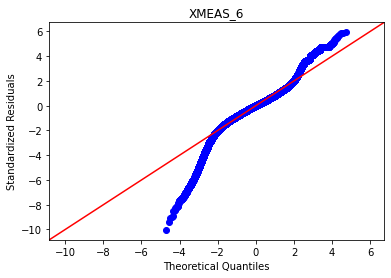

In [131]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_6')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

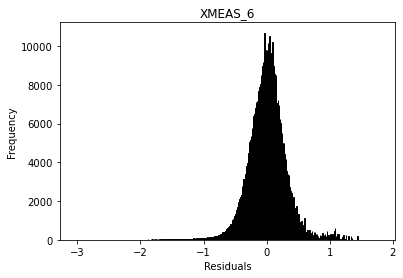

In [132]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_6')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [133]:
# xmeas_7
res.tukey_hsd(df=data_prcs, res_var='xmeas_7', xfac_var='faultNumber', anova_model='xmeas_7 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,6.580415,5.284544,7.876285,25.450605,0.001
1,1,3,6.549896,5.254026,7.845767,25.332570,0.001
2,1,4,6.547923,5.252053,7.843794,25.324940,0.001
3,1,5,7.702978,6.407107,8.998848,29.792262,0.001
4,1,6,235.999368,234.703498,237.295238,912.758054,0.001
...,...,...,...,...,...,...,...
185,17,19,0.090952,-1.212992,1.394897,0.349592,0.900
186,17,20,0.252542,-1.051402,1.556487,0.970693,0.900
187,18,19,95.140267,93.836323,96.444212,365.688823,0.001
188,18,20,94.978677,93.674733,96.282622,365.067722,0.001


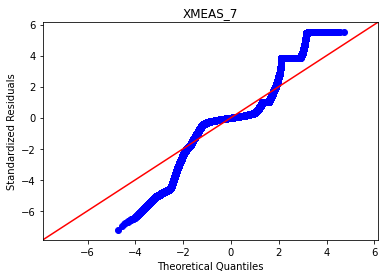

In [134]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_7')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

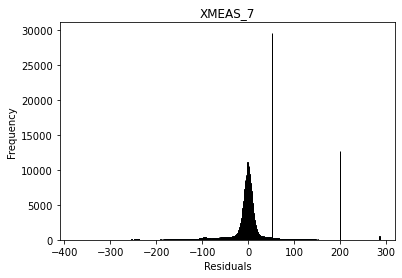

In [135]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_7')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [136]:
# xmeas_8
res.tukey_hsd(df=data_prcs, res_var='xmeas_8', xfac_var='faultNumber', anova_model='xmeas_8 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.170657,0.138119,0.203195,26.287172,0.001
1,1,3,0.114462,0.081924,0.146999,17.631155,0.001
2,1,4,0.114458,0.081921,0.146996,17.630592,0.001
3,1,5,0.114032,0.081495,0.146570,17.565000,0.001
4,1,6,0.886971,0.854433,0.919509,136.624811,0.001
...,...,...,...,...,...,...,...
185,17,19,0.003921,-0.028820,0.036661,0.600171,0.900
186,17,20,0.008656,-0.024085,0.041396,1.325042,0.900
187,18,19,1.421956,1.389216,1.454697,217.675132,0.001
188,18,20,1.417221,1.384481,1.449961,216.950261,0.001


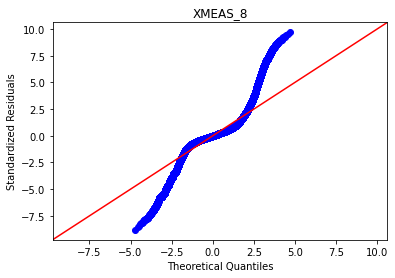

In [137]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_8')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

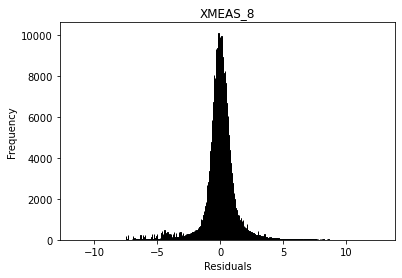

In [138]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_8')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [139]:
# xmeas_9
res.tukey_hsd(df=data_prcs, res_var='xmeas_9', xfac_var='faultNumber', anova_model='xmeas_9 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.000120,-0.001692,0.001932,0.332620,0.900000
1,1,3,0.000057,-0.001755,0.001868,0.156407,0.900000
2,1,4,0.000006,-0.001806,0.001818,0.016392,0.900000
3,1,5,0.000023,-0.001788,0.001835,0.064885,0.900000
4,1,6,0.002076,0.000264,0.003887,5.741280,0.007653
...,...,...,...,...,...,...,...
185,17,19,0.001684,-0.000139,0.003507,4.629338,0.114693
186,17,20,0.001697,-0.000126,0.003520,4.665763,0.106267
187,18,19,0.000486,-0.001338,0.002309,1.334646,0.900000
188,18,20,0.000499,-0.001324,0.002322,1.371070,0.900000


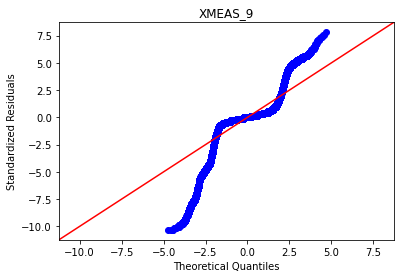

In [140]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_9')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

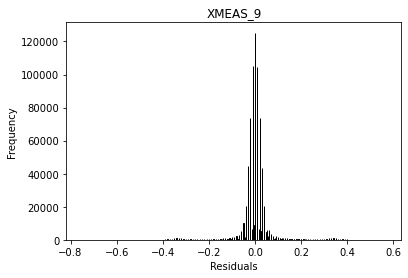

In [141]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_9')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [142]:
# xmeas_10
res.tukey_hsd(df=data_prcs, res_var='xmeas_10', xfac_var='faultNumber', anova_model='xmeas_10 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.347664,0.346696,0.348632,1799.266148,0.001
1,1,3,0.018384,0.017416,0.019353,95.144991,0.001
2,1,4,0.018296,0.017328,0.019264,94.687163,0.001
3,1,5,0.017745,0.016777,0.018714,91.837644,0.001
4,1,6,0.083926,0.082958,0.084895,434.344409,0.001
...,...,...,...,...,...,...,...
185,17,19,0.000077,-0.000898,0.001051,0.395407,0.900
186,17,20,0.000273,-0.000702,0.001247,1.403321,0.900
187,18,19,0.012805,0.011831,0.013780,65.859626,0.001
188,18,20,0.013001,0.012027,0.013975,66.867539,0.001


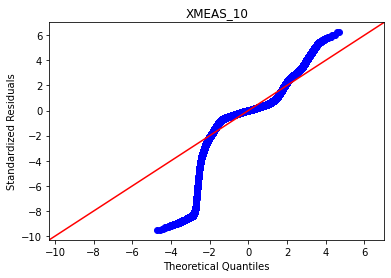

In [143]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_10')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

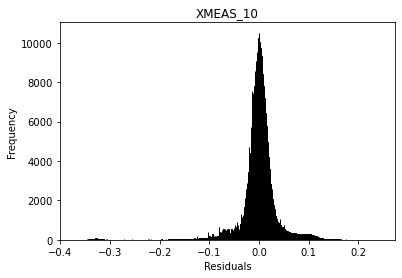

In [144]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_10')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [145]:
# xmeas_11
res.tukey_hsd(df=data_prcs, res_var='xmeas_11', xfac_var='faultNumber', anova_model='xmeas_11 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.959446,0.928704,0.990188,156.421764,0.001
1,1,3,0.106235,0.075493,0.136977,17.319894,0.001
2,1,4,0.105959,0.075218,0.136701,17.274917,0.001
3,1,5,0.224915,0.194174,0.255657,36.668721,0.001
4,1,6,5.629460,5.598718,5.660201,917.790077,0.001
...,...,...,...,...,...,...,...
185,17,19,0.006025,-0.024909,0.036958,0.976121,0.900
186,17,20,0.198543,0.167610,0.229476,32.168695,0.001
187,18,19,1.686719,1.655785,1.717652,273.288778,0.001
188,18,20,1.494200,1.463267,1.525134,242.096204,0.001


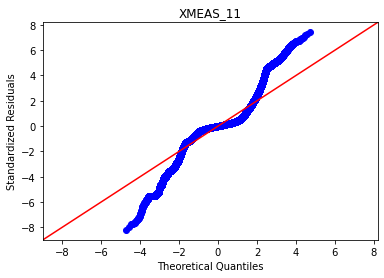

In [146]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_11')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

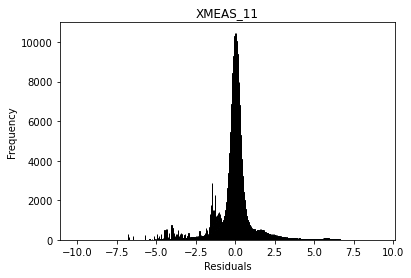

In [147]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_11')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [148]:
# xmeas_12
res.tukey_hsd(df=data_prcs, res_var='xmeas_12', xfac_var='faultNumber', anova_model='xmeas_12 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.140788,0.116032,0.165544,28.502678,0.001000
1,1,3,0.007819,-0.016937,0.032575,1.582933,0.900000
2,1,4,0.007808,-0.016948,0.032565,1.580804,0.900000
3,1,5,0.015298,-0.009458,0.040054,3.097123,0.775208
4,1,6,0.249508,0.224752,0.274264,50.513158,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.009942,-0.014968,0.034853,2.000387,0.900000
186,17,20,0.017198,-0.007713,0.042108,3.460161,0.605759
187,18,19,0.272761,0.247851,0.297672,54.878893,0.001000
188,18,20,0.265506,0.240595,0.290416,53.419119,0.001000


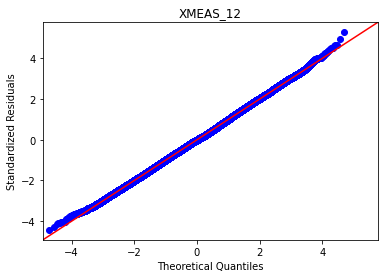

In [149]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_12')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

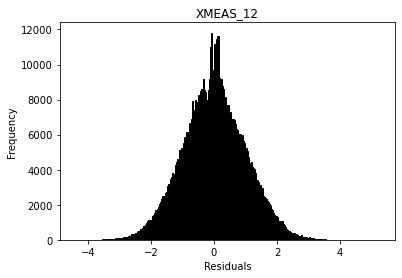

In [150]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_12')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [151]:
# xmeas_13
res.tukey_hsd(df=data_prcs, res_var='xmeas_13', xfac_var='faultNumber', anova_model='xmeas_13 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,6.991123,5.652137,8.330110,26.168398,0.001
1,1,3,6.352249,5.013263,7.691236,23.777035,0.001
2,1,4,6.350027,5.011041,7.689014,23.768717,0.001
3,1,5,7.476526,6.137539,8.815512,27.985303,0.001
4,1,6,228.856227,227.517241,230.195214,856.629243,0.001
...,...,...,...,...,...,...,...
185,17,19,0.074873,-1.272457,1.422202,0.278519,0.900
186,17,20,13.643692,12.296363,14.991022,50.753333,0.001
187,18,19,99.906402,98.559073,101.253732,371.643008,0.001
188,18,20,113.624967,112.277638,114.972297,422.674861,0.001


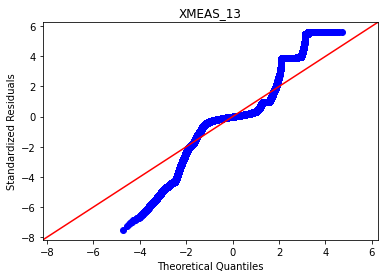

In [152]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_13')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

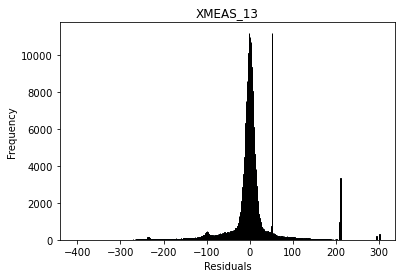

In [153]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_13')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [154]:
# xmeas_14
res.tukey_hsd(df=data_prcs, res_var='xmeas_14', xfac_var='faultNumber', anova_model='xmeas_14 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.277996,0.250887,0.305105,51.396537,0.001000
1,1,3,0.017927,-0.009182,0.045036,3.314398,0.673792
2,1,4,0.017891,-0.009218,0.045000,3.307742,0.676901
3,1,5,0.022718,-0.004391,0.049827,4.200135,0.248077
4,1,6,0.287880,0.260772,0.314989,53.224006,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.006952,-0.020326,0.034230,1.277316,0.900000
186,17,20,0.008137,-0.019141,0.035414,1.494990,0.900000
187,18,19,0.649851,0.622574,0.677129,119.402095,0.001000
188,18,20,0.634763,0.607485,0.662041,116.629789,0.001000


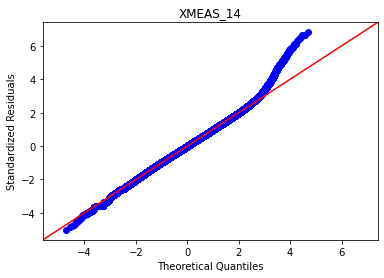

In [155]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_14')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

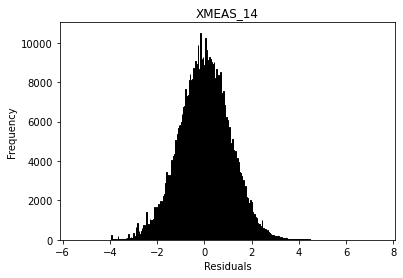

In [156]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_14')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [157]:
# xmeas_15
res.tukey_hsd(df=data_prcs, res_var='xmeas_15', xfac_var='faultNumber', anova_model='xmeas_15 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.042752,0.017406,0.068099,8.453672,0.001000
1,1,3,0.059134,0.033787,0.084480,11.692828,0.001000
2,1,4,0.059117,0.033771,0.084464,11.689591,0.001000
3,1,5,0.031659,0.006313,0.057006,6.260179,0.001619
4,1,6,0.308476,0.283129,0.333822,60.996591,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.000942,-0.024563,0.026446,0.185045,0.900000
186,17,20,0.002198,-0.023307,0.027703,0.431956,0.900000
187,18,19,0.307344,0.281839,0.332849,60.396502,0.001000
188,18,20,0.306087,0.280583,0.331592,60.149590,0.001000


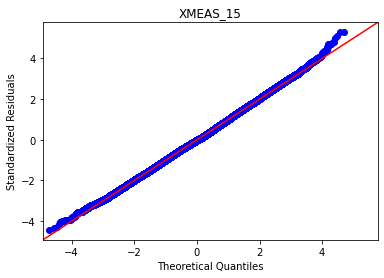

In [158]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_15')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

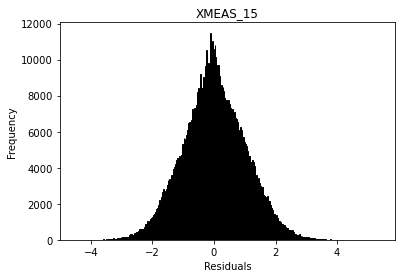

In [159]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_15')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [160]:
# xmeas_16
res.tukey_hsd(df=data_prcs, res_var='xmeas_16', xfac_var='faultNumber', anova_model='xmeas_16 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,4.252254,3.077359,5.427149,18.139553,0.001
1,1,3,7.637235,6.462340,8.812129,32.579430,0.001
2,1,4,7.637760,6.462866,8.812655,32.581673,0.001
3,1,5,8.967980,7.793085,10.142875,38.256214,0.001
4,1,6,277.146099,275.971204,278.320994,1182.268501,0.001
...,...,...,...,...,...,...,...
185,17,19,0.130157,-1.052058,1.312373,0.551797,0.900
186,17,20,0.172682,-1.009533,1.354898,0.732079,0.900
187,18,19,76.218828,75.036612,77.401043,323.126143,0.001
188,18,20,76.176303,74.994087,77.358518,322.945860,0.001


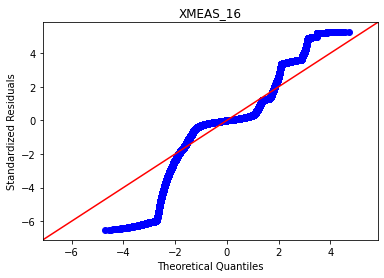

In [161]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_16')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

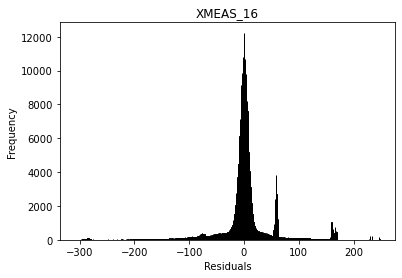

In [162]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_16')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [163]:
# xmeas_17
res.tukey_hsd(df=data_prcs, res_var='xmeas_17', xfac_var='faultNumber', anova_model='xmeas_17 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.014690,-0.001399,0.030779,4.576054,0.126001
1,1,3,0.000714,-0.015375,0.016803,0.222439,0.900000
2,1,4,0.000715,-0.015375,0.016804,0.222647,0.900000
3,1,5,0.034962,0.018872,0.051051,10.890858,0.001000
4,1,6,0.237430,0.221340,0.253519,73.961175,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.002553,-0.013637,0.018742,0.790277,0.900000
186,17,20,0.002849,-0.013340,0.019039,0.882036,0.900000
187,18,19,0.093311,0.077122,0.109501,28.887205,0.001000
188,18,20,0.093015,0.076825,0.109205,28.795446,0.001000


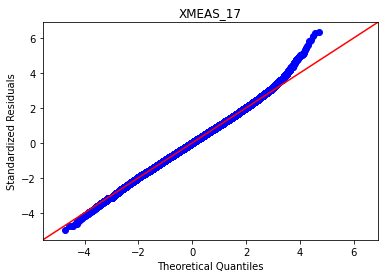

In [164]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_17')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

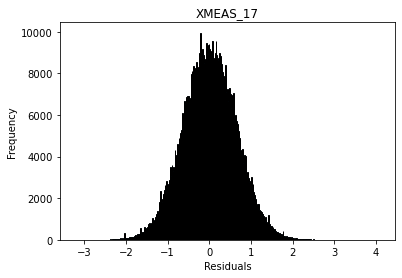

In [165]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_17')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [166]:
# xmeas_18
res.tukey_hsd(df=data_prcs, res_var='xmeas_18', xfac_var='faultNumber', anova_model='xmeas_18 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,4.819439,4.778491,4.860386,589.894607,0.001
1,1,3,2.438757,2.397810,2.479705,298.501513,0.001
2,1,4,2.438713,2.397765,2.479660,298.496067,0.001
3,1,5,2.493583,2.452635,2.534530,305.212068,0.001
4,1,6,1.250118,1.209170,1.291065,153.013182,0.001
...,...,...,...,...,...,...,...
185,17,19,0.004138,-0.037064,0.045341,0.503391,0.900
186,17,20,0.068448,0.027245,0.109651,8.326101,0.001
187,18,19,1.154105,1.112902,1.195307,140.386583,0.001
188,18,20,1.226691,1.185488,1.267894,149.216075,0.001


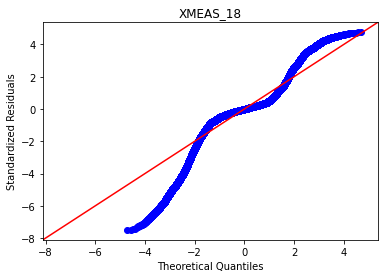

In [167]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_18')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

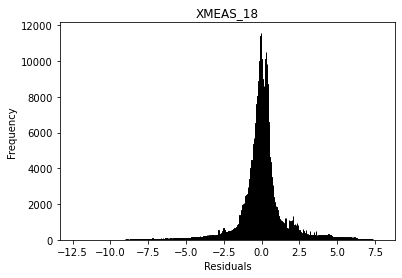

In [168]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_18')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [169]:
# xmeas_19
res.tukey_hsd(df=data_prcs, res_var='xmeas_19', xfac_var='faultNumber', anova_model='xmeas_19 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,131.767475,130.515434,133.019516,527.467870,0.001000
1,1,3,51.523320,50.271279,52.775361,206.248892,0.001000
2,1,4,51.516179,50.264138,52.768220,206.220307,0.001000
3,1,5,55.841273,54.589231,57.093314,223.533744,0.001000
4,1,6,135.357485,134.105444,136.609527,541.838753,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.242156,-1.017686,1.501998,0.963353,0.900000
186,17,20,1.719056,0.459214,2.978898,6.838805,0.001000
187,18,19,62.208891,60.949049,63.468733,247.481495,0.001000
188,18,20,60.731992,59.472150,61.991834,241.606043,0.001000


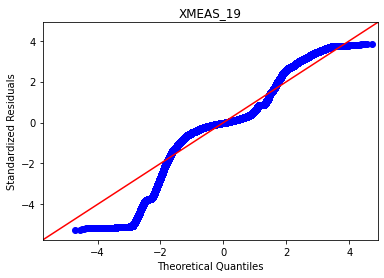

In [170]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_19')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

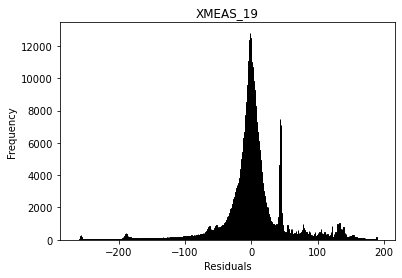

In [171]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_19')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [172]:
# xmeas_20
res.tukey_hsd(df=data_prcs, res_var='xmeas_20', xfac_var='faultNumber', anova_model='xmeas_20 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,1.800748,1.583955,2.017542,41.630579,0.001
1,1,3,1.435142,1.218348,1.651936,33.178317,0.001
2,1,4,1.435841,1.219048,1.652635,33.194483,0.001
3,1,5,1.227848,1.011054,1.444642,28.385986,0.001
4,1,6,28.169569,27.952776,28.386363,651.237837,0.001
...,...,...,...,...,...,...,...
185,17,19,0.049781,-0.168363,0.267926,1.143741,0.900
186,17,20,3.732297,3.514153,3.950442,85.750789,0.001
187,18,19,12.545732,12.327587,12.763876,288.242422,0.001
188,18,20,16.228248,16.010103,16.446392,372.849470,0.001


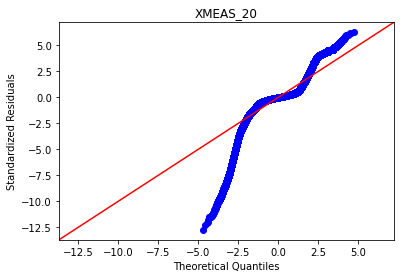

In [173]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_20')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

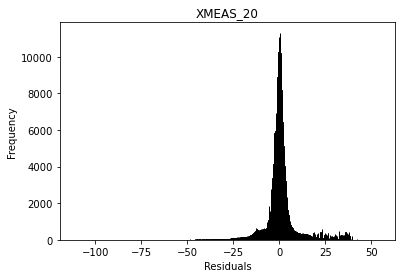

In [174]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_20')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [175]:
# xmeas_21
res.tukey_hsd(df=data_prcs, res_var='xmeas_21', xfac_var='faultNumber', anova_model='xmeas_21 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.196109,0.170891,0.221326,38.976306,0.001000
1,1,3,0.086166,0.060948,0.111383,17.125277,0.001000
2,1,4,0.053922,0.028704,0.079139,10.716919,0.001000
3,1,5,0.025317,0.000100,0.050535,5.031781,0.047808
4,1,6,0.906827,0.881610,0.932045,180.230728,0.001000
...,...,...,...,...,...,...,...
185,17,19,3.513165,3.487790,3.538539,693.913184,0.001000
186,17,20,3.540514,3.515139,3.565889,699.315217,0.001000
187,18,19,0.679269,0.653894,0.704643,134.167746,0.001000
188,18,20,0.706618,0.681243,0.731993,139.569779,0.001000


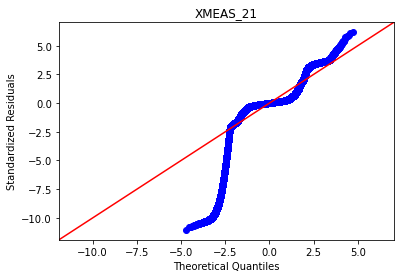

In [176]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_21')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

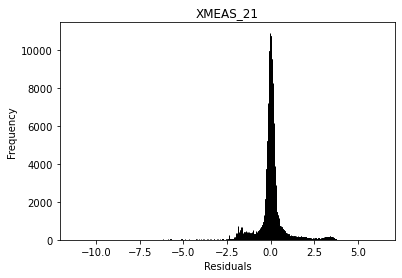

In [177]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_21')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [178]:
# xmeas_22
res.tukey_hsd(df=data_prcs, res_var='xmeas_22', xfac_var='faultNumber', anova_model='xmeas_22 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,1.601957,1.577433,1.626481,327.390290,0.001
1,1,3,0.106847,0.082323,0.131371,21.836117,0.001
2,1,4,0.106511,0.081987,0.131035,21.767555,0.001
3,1,5,0.193263,0.168739,0.217787,39.496946,0.001
4,1,6,3.300816,3.276292,3.325340,674.584135,0.001
...,...,...,...,...,...,...,...
185,17,19,0.005466,-0.019211,0.030143,1.110209,0.900
186,17,20,0.181251,0.156574,0.205928,36.812740,0.001
187,18,19,3.043608,3.018931,3.068285,618.167315,0.001
188,18,20,2.867823,2.843146,2.892500,582.464784,0.001


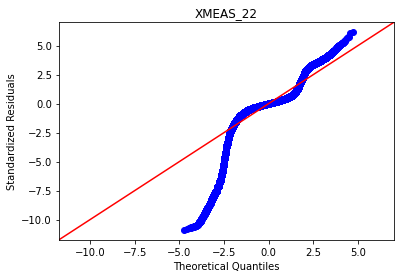

In [179]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_22')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

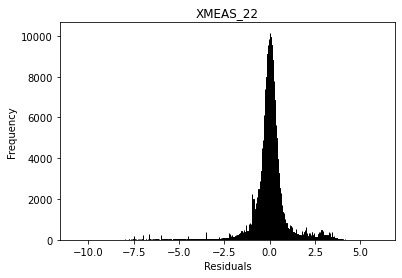

In [180]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_22')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [181]:
# xmeas_23
res.tukey_hsd(df=data_prcs, res_var='xmeas_23', xfac_var='faultNumber', anova_model='xmeas_23 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.220917,0.196785,0.245050,45.880338,0.001
1,1,3,0.233147,0.209014,0.257280,48.420239,0.001
2,1,4,0.233142,0.209009,0.257275,48.419060,0.001
3,1,5,0.234720,0.210587,0.258853,48.746785,0.001
4,1,6,6.303182,6.279049,6.327315,1309.050376,0.001
...,...,...,...,...,...,...,...
185,17,19,0.000302,-0.023982,0.024585,0.062228,0.900
186,17,20,0.000789,-0.023494,0.025072,0.162846,0.900
187,18,19,1.654283,1.630000,1.678567,341.435683,0.001
188,18,20,1.653193,1.628910,1.677476,341.210610,0.001


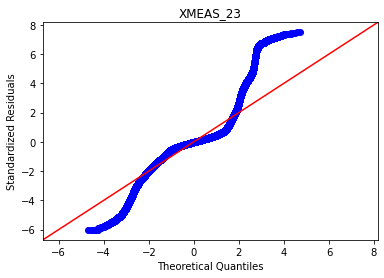

In [182]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_23')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

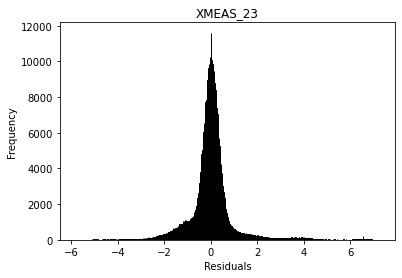

In [183]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_23')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [184]:
# xmeas_24
res.tukey_hsd(df=data_prcs, res_var='xmeas_24', xfac_var='faultNumber', anova_model='xmeas_24 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.195794,0.190615,0.200973,189.468352,0.001000
1,1,3,0.003921,-0.001258,0.009100,3.794389,0.446266
2,1,4,0.003911,-0.001268,0.009090,3.784822,0.451265
3,1,5,0.008721,0.003542,0.013900,8.439139,0.001000
4,1,6,0.183964,0.178785,0.189143,178.020476,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.000817,-0.004394,0.006029,0.785917,0.900000
186,17,20,0.000546,-0.004666,0.005758,0.525079,0.900000
187,18,19,0.295022,0.289810,0.300233,283.722852,0.001000
188,18,20,0.296385,0.291174,0.301597,285.033847,0.001000


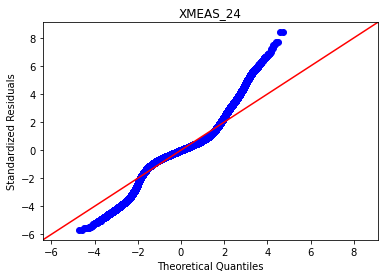

In [185]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_24')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

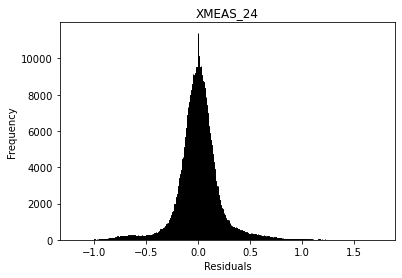

In [186]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_24')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [187]:
# xmeas_25
res.tukey_hsd(df=data_prcs, res_var='xmeas_25', xfac_var='faultNumber', anova_model='xmeas_25 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.073457,0.046983,0.099931,13.906654,0.001
1,1,3,0.212780,0.186306,0.239254,40.282891,0.001
2,1,4,0.212685,0.186211,0.239159,40.264866,0.001
3,1,5,0.243988,0.217514,0.270461,46.190992,0.001
4,1,6,7.367333,7.340859,7.393807,1394.761145,0.001
...,...,...,...,...,...,...,...
185,17,19,0.003315,-0.023324,0.029954,0.623662,0.900
186,17,20,0.002906,-0.023733,0.029545,0.546767,0.900
187,18,19,0.593232,0.566594,0.619871,111.613546,0.001
188,18,20,0.593641,0.567002,0.620280,111.690441,0.001


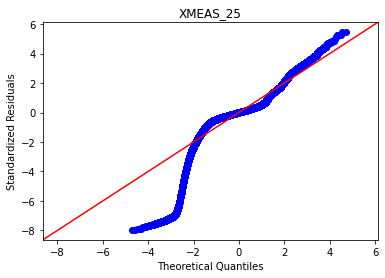

In [188]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_25')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

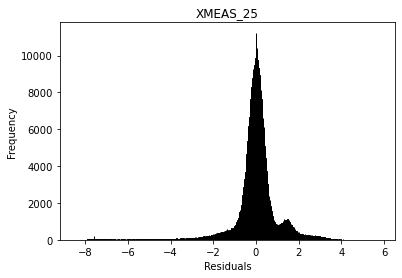

In [189]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_25')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [190]:
# xmeas_26
res.tukey_hsd(df=data_prcs, res_var='xmeas_26', xfac_var='faultNumber', anova_model='xmeas_26 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.005079,0.001817,0.008342,7.802509,0.001
1,1,3,0.000615,-0.002648,0.003877,0.943951,0.900
2,1,4,0.000614,-0.002648,0.003877,0.943905,0.900
3,1,5,0.000539,-0.002724,0.003801,0.827473,0.900
4,1,6,0.025840,0.022577,0.029102,39.691987,0.001
...,...,...,...,...,...,...,...
185,17,19,0.000079,-0.003204,0.003362,0.120409,0.900
186,17,20,0.000265,-0.003018,0.003549,0.405170,0.900
187,18,19,0.136147,0.132864,0.139431,207.840431,0.001
188,18,20,0.135961,0.132678,0.139244,207.555670,0.001


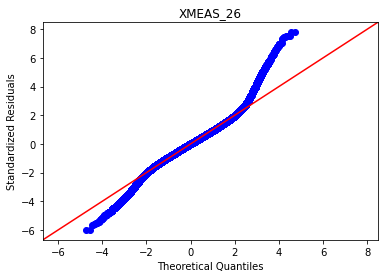

In [191]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_26')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

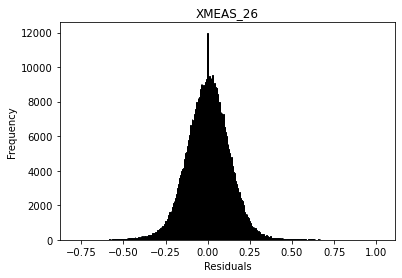

In [192]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_26')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [193]:
# xmeas_27
res.tukey_hsd(df=data_prcs, res_var='xmeas_27', xfac_var='faultNumber', anova_model='xmeas_27 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.091575,0.069336,0.113815,20.637343,0.001
1,1,3,0.007807,-0.014433,0.030046,1.759279,0.900
2,1,4,0.007808,-0.014432,0.030047,1.759524,0.900
3,1,5,0.006939,-0.015301,0.029179,1.563801,0.900
4,1,6,0.336617,0.314377,0.358857,75.859675,0.001
...,...,...,...,...,...,...,...
185,17,19,0.000676,-0.021703,0.023054,0.151332,0.900
186,17,20,0.000033,-0.022346,0.022411,0.007324,0.900
187,18,19,1.554954,1.532575,1.577332,348.252863,0.001
188,18,20,1.554311,1.531932,1.576689,348.108854,0.001


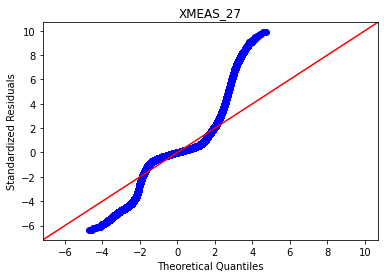

In [194]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_27')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

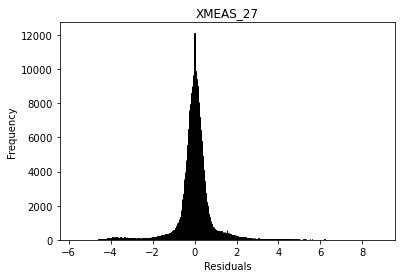

In [195]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_27')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [196]:
# xmeas_28
res.tukey_hsd(df=data_prcs, res_var='xmeas_28', xfac_var='faultNumber', anova_model='xmeas_28 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.503628,0.501885,0.505371,1448.142571,0.001000
1,1,3,0.029521,0.027778,0.031264,84.886318,0.001000
2,1,4,0.029562,0.027819,0.031305,85.004487,0.001000
3,1,5,0.028395,0.026652,0.030138,81.646533,0.001000
4,1,6,0.160781,0.159038,0.162524,462.312958,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.000734,-0.001020,0.002488,2.097691,0.900000
186,17,20,0.001860,0.000106,0.003614,5.315812,0.023958
187,18,19,0.042197,0.040443,0.043951,120.582111,0.001000
188,18,20,0.041071,0.039317,0.042824,117.363991,0.001000


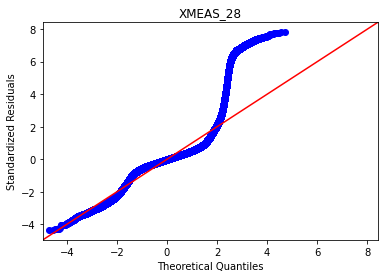

In [197]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_28')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

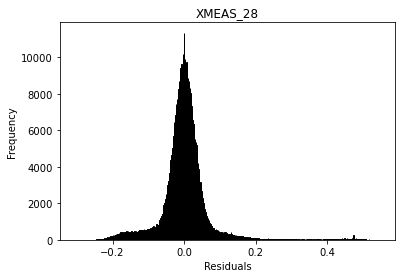

In [198]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_28')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [199]:
# xmeas_29
res.tukey_hsd(df=data_prcs, res_var='xmeas_29', xfac_var='faultNumber', anova_model='xmeas_29 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.214744,0.178508,0.250981,29.701555,0.001
1,1,3,0.346862,0.310625,0.383098,47.974885,0.001
2,1,4,0.346873,0.310637,0.383110,47.976503,0.001
3,1,5,0.346325,0.310088,0.382562,47.900634,0.001
4,1,6,9.445757,9.409521,9.481994,1306.454639,0.001
...,...,...,...,...,...,...,...
185,17,19,0.005950,-0.030512,0.042413,0.817877,0.900
186,17,20,0.003562,-0.032900,0.040025,0.489669,0.900
187,18,19,2.578325,2.541863,2.614788,354.403280,0.001
188,18,20,2.575937,2.539475,2.612400,354.075073,0.001


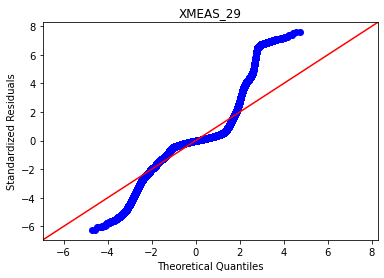

In [200]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_29')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

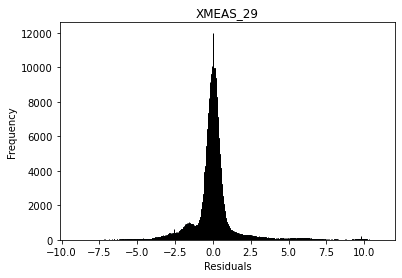

In [201]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_29')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [202]:
# xmeas_30
res.tukey_hsd(df=data_prcs, res_var='xmeas_30', xfac_var='faultNumber', anova_model='xmeas_30 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.244142,0.237448,0.250836,182.784997,0.001
1,1,3,0.012283,0.005589,0.018978,9.196338,0.001
2,1,4,0.012275,0.005581,0.018969,9.190090,0.001
3,1,5,0.012167,0.005472,0.018861,9.108863,0.001
4,1,6,0.284695,0.278001,0.291390,213.146430,0.001
...,...,...,...,...,...,...,...
185,17,19,0.000249,-0.006487,0.006985,0.185305,0.900
186,17,20,0.000031,-0.006705,0.006767,0.023065,0.900
187,18,19,0.376494,0.369758,0.383230,280.128933,0.001
188,18,20,0.376214,0.369478,0.382950,279.920563,0.001


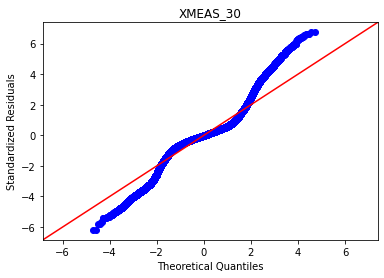

In [203]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_30')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

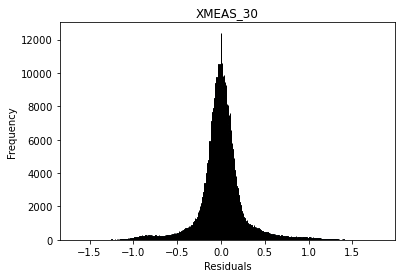

In [204]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_30')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [205]:
# xmeas_31
res.tukey_hsd(df=data_prcs, res_var='xmeas_31', xfac_var='faultNumber', anova_model='xmeas_31 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.020799,-0.018653,0.060251,2.642262,0.900
1,1,3,0.347804,0.308351,0.387256,44.184234,0.001
2,1,4,0.347651,0.308198,0.387103,44.164824,0.001
3,1,5,0.394982,0.355530,0.434435,50.177718,0.001
4,1,6,11.483268,11.443816,11.522721,1458.809929,0.001
...,...,...,...,...,...,...,...
185,17,19,0.005590,-0.034108,0.045288,0.705763,0.900
186,17,20,0.004864,-0.034834,0.044562,0.614061,0.900
187,18,19,0.653890,0.614192,0.693588,82.554428,0.001
188,18,20,0.654616,0.614918,0.694315,82.646131,0.001


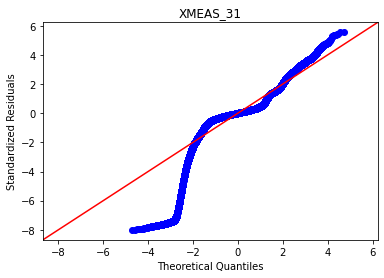

In [206]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_31')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

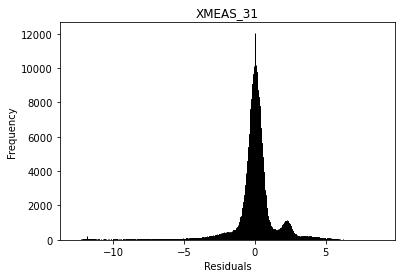

In [207]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_31')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [208]:
# xmeas_32
res.tukey_hsd(df=data_prcs, res_var='xmeas_32', xfac_var='faultNumber', anova_model='xmeas_32 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.009623,0.006089,0.013156,13.649472,0.001000
1,1,3,0.004628,0.001095,0.008161,6.564881,0.001000
2,1,4,0.004623,0.001089,0.008156,6.556943,0.001000
3,1,5,0.002676,-0.000857,0.006209,3.795886,0.445482
4,1,6,0.060587,0.057054,0.064120,85.941034,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.000030,-0.003525,0.003585,0.042338,0.900000
186,17,20,0.000154,-0.003401,0.003710,0.217395,0.900000
187,18,19,0.161810,0.158255,0.165365,228.102169,0.001000
188,18,20,0.161994,0.158439,0.165550,228.361901,0.001000


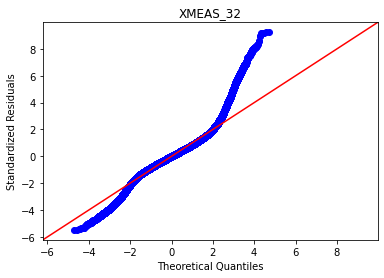

In [209]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_32')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

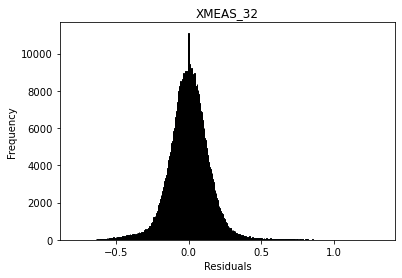

In [210]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_32')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [211]:
# xmeas_33
res.tukey_hsd(df=data_prcs, res_var='xmeas_33', xfac_var='faultNumber', anova_model='xmeas_33 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.083305,0.052013,0.114598,13.342501,0.001
1,1,3,0.009723,-0.021569,0.041016,1.557304,0.900
2,1,4,0.009751,-0.021542,0.041043,1.561725,0.900
3,1,5,0.001474,-0.029819,0.032766,0.236015,0.900
4,1,6,0.143952,0.112659,0.175244,23.055953,0.001
...,...,...,...,...,...,...,...
185,17,19,0.000514,-0.030974,0.032001,0.081751,0.900
186,17,20,0.003451,-0.028037,0.034938,0.549273,0.900
187,18,19,2.200127,2.168640,2.231615,350.200132,0.001
188,18,20,2.203065,2.171577,2.234552,350.667654,0.001


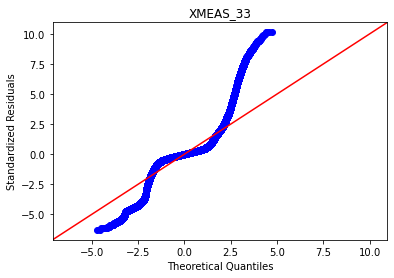

In [212]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_33')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

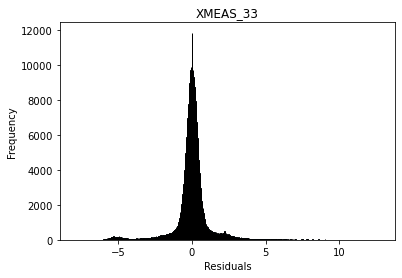

In [213]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_33')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [214]:
# xmeas_34
res.tukey_hsd(df=data_prcs, res_var='xmeas_34', xfac_var='faultNumber', anova_model='xmeas_34 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.671590,0.669241,0.673938,1433.067042,0.001000
1,1,3,0.036950,0.034601,0.039299,78.845766,0.001000
2,1,4,0.037008,0.034659,0.039356,78.968412,0.001000
3,1,5,0.035359,0.033010,0.037708,75.450100,0.001000
4,1,6,0.279581,0.277233,0.281930,596.583034,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.000986,-0.001377,0.003350,2.091854,0.900000
186,17,20,0.001904,-0.000459,0.004268,4.037903,0.318627
187,18,19,0.057572,0.055209,0.059936,122.089614,0.001000
188,18,20,0.056655,0.054291,0.059018,120.143564,0.001000


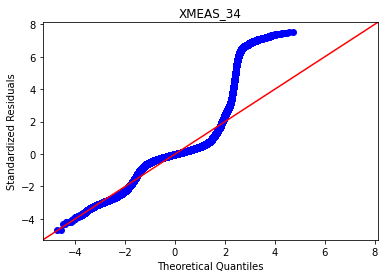

In [215]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_34')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

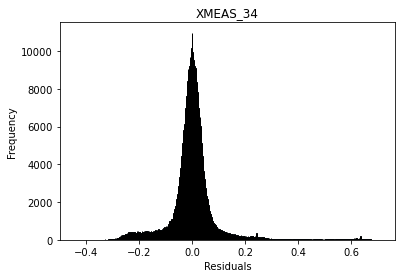

In [216]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_34')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [217]:
# xmeas_35
res.tukey_hsd(df=data_prcs, res_var='xmeas_35', xfac_var='faultNumber', anova_model='xmeas_35 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.185177,0.179178,0.191175,154.720163,0.001
1,1,3,0.022463,0.016464,0.028461,18.768266,0.001
2,1,4,0.022411,0.016412,0.028409,18.724917,0.001
3,1,5,0.046266,0.040267,0.052265,38.656509,0.001
4,1,6,1.086226,1.080227,1.092224,907.571050,0.001
...,...,...,...,...,...,...,...
185,17,19,0.001761,-0.004275,0.007797,1.462556,0.900
186,17,20,0.002494,-0.003542,0.008530,2.071051,0.900
187,18,19,0.302139,0.296103,0.308175,250.882483,0.001
188,18,20,0.301407,0.295371,0.307442,250.273987,0.001


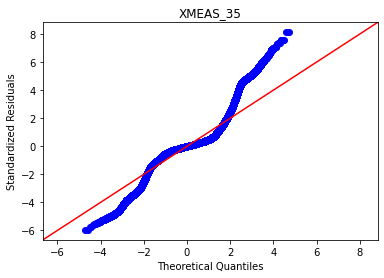

In [218]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_35')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

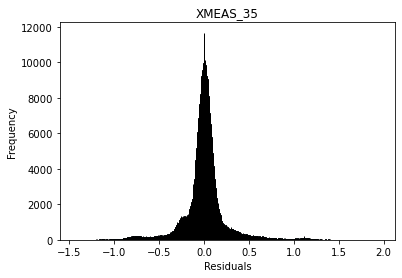

In [219]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_35')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [220]:
# xmeas_36
res.tukey_hsd(df=data_prcs, res_var='xmeas_36', xfac_var='faultNumber', anova_model='xmeas_36 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.099657,0.096501,0.102812,158.269357,0.001
1,1,3,0.017498,0.014342,0.020653,27.788776,0.001
2,1,4,0.017480,0.014324,0.020636,27.760323,0.001
3,1,5,0.026782,0.023626,0.029938,42.533501,0.001
4,1,6,0.589168,0.586012,0.592324,935.685938,0.001
...,...,...,...,...,...,...,...
185,17,19,0.000567,-0.002609,0.003742,0.894557,0.900
186,17,20,0.000930,-0.002245,0.004106,1.468345,0.900
187,18,19,0.131514,0.128338,0.134689,207.569966,0.001
188,18,20,0.131150,0.127975,0.134326,206.996177,0.001


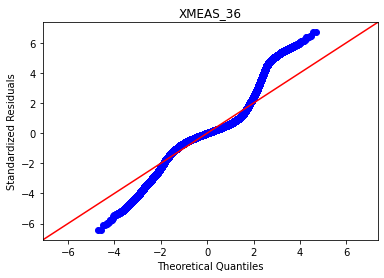

In [221]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_36')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

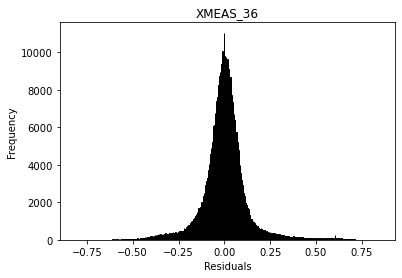

In [222]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_36')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [223]:
# xmeas_37
res.tukey_hsd(df=data_prcs, res_var='xmeas_37', xfac_var='faultNumber', anova_model='xmeas_37 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.000035,-0.000216,0.000286,0.701334,0.900
1,1,3,0.000071,-0.000180,0.000322,1.412723,0.900
2,1,4,0.000071,-0.000180,0.000322,1.409653,0.900
3,1,5,0.000039,-0.000212,0.000290,0.770338,0.900
4,1,6,0.004116,0.003865,0.004367,82.188751,0.001
...,...,...,...,...,...,...,...
185,17,19,0.000022,-0.000231,0.000274,0.427056,0.900
186,17,20,0.000105,-0.000147,0.000358,2.086671,0.900
187,18,19,0.002173,0.001920,0.002425,43.113132,0.001
188,18,20,0.002299,0.002047,0.002552,45.626859,0.001


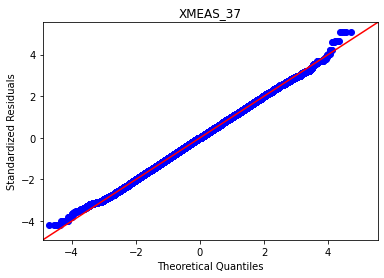

In [224]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_37')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

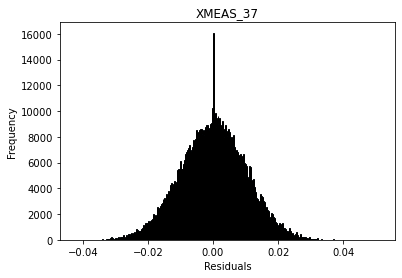

In [225]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_37')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [226]:
# xmeas_38
res.tukey_hsd(df=data_prcs, res_var='xmeas_38', xfac_var='faultNumber', anova_model='xmeas_38 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.002204,0.000211,0.004197,5.542207,0.013263
1,1,3,0.000675,-0.001318,0.002668,1.697915,0.900000
2,1,4,0.000675,-0.001318,0.002669,1.698291,0.900000
3,1,5,0.000611,-0.001383,0.002604,1.535558,0.900000
4,1,6,0.176162,0.174169,0.178155,442.954875,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.000013,-0.001993,0.002019,0.032145,0.900000
186,17,20,0.000057,-0.001949,0.002063,0.142687,0.900000
187,18,19,0.103121,0.101116,0.105127,257.690638,0.001000
188,18,20,0.103052,0.101046,0.105057,257.515805,0.001000


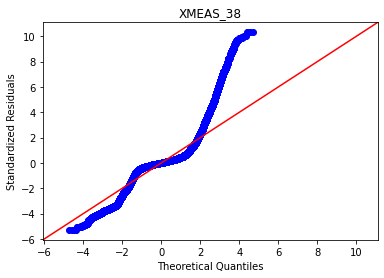

In [227]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_38')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

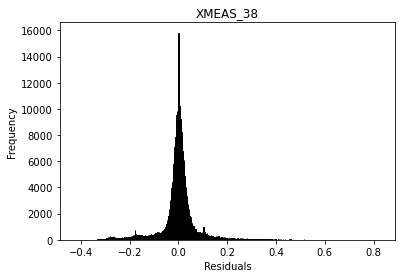

In [228]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_38')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [229]:
# xmeas_39
res.tukey_hsd(df=data_prcs, res_var='xmeas_39', xfac_var='faultNumber', anova_model='xmeas_39 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.028196,0.027897,0.028495,472.781863,0.001000
1,1,3,0.001418,0.001119,0.001717,23.773742,0.001000
2,1,4,0.001420,0.001121,0.001719,23.814139,0.001000
3,1,5,0.001426,0.001127,0.001725,23.903636,0.001000
4,1,6,0.004709,0.004410,0.005008,78.964882,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.000027,-0.000274,0.000327,0.445105,0.900000
186,17,20,0.000201,-0.000100,0.000502,3.348619,0.657819
187,18,19,0.005707,0.005406,0.006008,95.102824,0.001000
188,18,20,0.005533,0.005232,0.005834,92.199310,0.001000


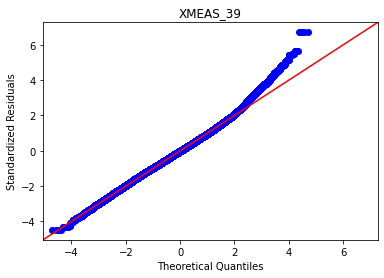

In [230]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_39')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

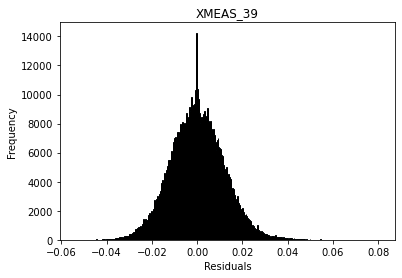

In [231]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_39')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [232]:
# xmeas_40
res.tukey_hsd(df=data_prcs, res_var='xmeas_40', xfac_var='faultNumber', anova_model='xmeas_40 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.066677,0.052842,0.080512,24.154724,0.001000
1,1,3,0.085051,0.071216,0.098886,30.810820,0.001000
2,1,4,0.085144,0.071309,0.098979,30.844721,0.001000
3,1,5,0.057450,0.043614,0.071285,20.811917,0.001000
4,1,6,0.607241,0.593406,0.621077,219.982037,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.007268,-0.006653,0.021190,2.616770,0.900000
186,17,20,0.002559,-0.011362,0.016481,0.921430,0.900000
187,18,19,0.330972,0.317051,0.344893,119.156990,0.001000
188,18,20,0.340800,0.326879,0.354721,122.695190,0.001000


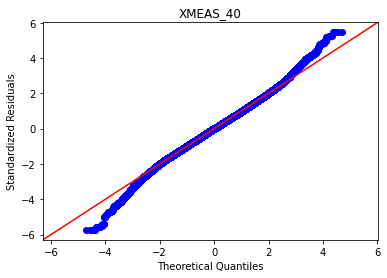

In [233]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_40')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

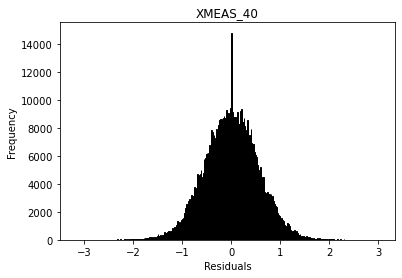

In [234]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_40')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [235]:
# xmeas_41
res.tukey_hsd(df=data_prcs, res_var='xmeas_41', xfac_var='faultNumber', anova_model='xmeas_41 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.002836,-0.011468,0.017140,0.993711,0.900
1,1,3,0.035186,0.020882,0.049490,12.328735,0.001
2,1,4,0.035277,0.020973,0.049581,12.360659,0.001
3,1,5,0.007504,-0.006800,0.021808,2.629191,0.900
4,1,6,0.887525,0.873221,0.901829,310.976171,0.001
...,...,...,...,...,...,...,...
185,17,19,0.005174,-0.009219,0.019567,1.801584,0.900
186,17,20,0.001751,-0.012642,0.016144,0.609727,0.900
187,18,19,0.331695,0.317302,0.346088,115.501572,0.001
188,18,20,0.328272,0.313879,0.342665,114.309715,0.001


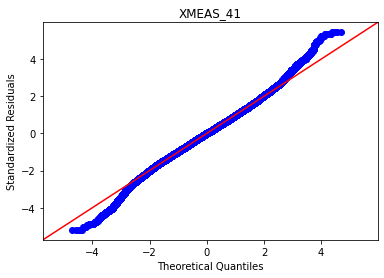

In [236]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMEAS_41')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

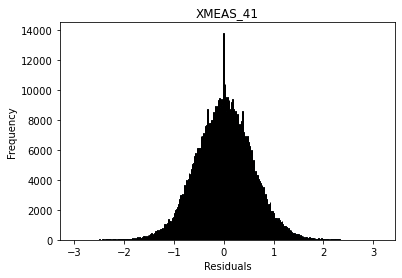

In [237]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMEAS_41')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [238]:
# xmv_1
res.tukey_hsd(df=data_prcs, res_var='xmv_1', xfac_var='faultNumber', anova_model='xmv_1 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.621227,0.548221,0.694233,42.647970,0.001000
1,1,3,0.107166,0.034160,0.180172,7.357076,0.001000
2,1,4,0.107229,0.034223,0.180235,7.361417,0.001000
3,1,5,0.054959,-0.018047,0.127965,3.772987,0.457399
4,1,6,2.298425,2.225419,2.371431,157.789621,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.002927,-0.070534,0.076388,0.199715,0.900000
186,17,20,0.009520,-0.063941,0.082981,0.649521,0.900000
187,18,19,6.509120,6.435659,6.582581,444.091939,0.001000
188,18,20,6.515713,6.442252,6.589173,444.541745,0.001000


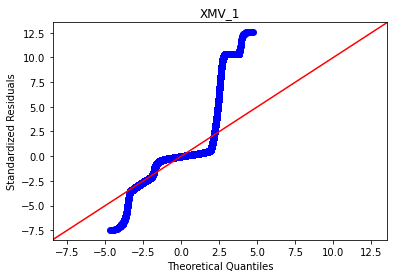

In [239]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_1')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

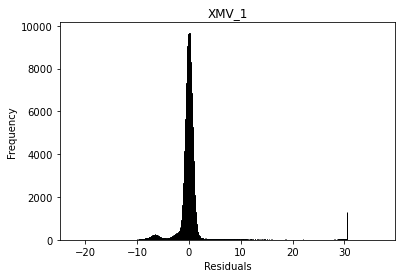

In [240]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_1')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [241]:
# xmv_2
res.tukey_hsd(df=data_prcs, res_var='xmv_2', xfac_var='faultNumber', anova_model='xmv_2 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,1.904830,1.794136,2.015525,86.245481,0.001
1,1,3,0.289565,0.178871,0.400260,13.110721,0.001
2,1,4,0.289859,0.179165,0.400554,13.124029,0.001
3,1,5,0.185404,0.074710,0.296099,8.394594,0.001
4,1,6,5.210975,5.100280,5.321670,235.938614,0.001
...,...,...,...,...,...,...,...
185,17,19,0.001095,-0.110289,0.112479,0.049267,0.900
186,17,20,0.005951,-0.105433,0.117336,0.267793,0.900
187,18,19,11.021497,10.910113,11.132882,495.933133,0.001
188,18,20,11.014451,10.903067,11.125835,495.616072,0.001


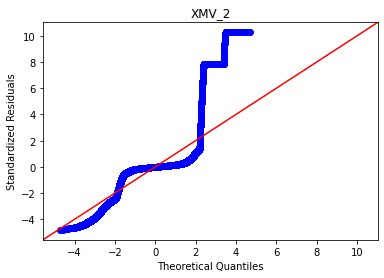

In [242]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_2')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

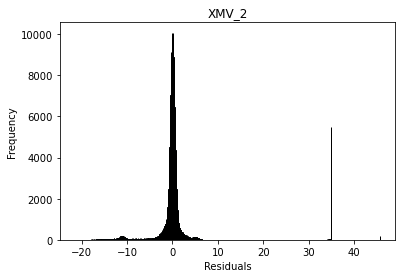

In [243]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_2')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [244]:
# xmv_3
res.tukey_hsd(df=data_prcs, res_var='xmv_3', xfac_var='faultNumber', anova_model='xmv_3 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,45.079841,44.850915,45.308766,986.948564,0.001
1,1,3,47.952014,47.723088,48.180939,1049.830038,0.001
2,1,4,47.952052,47.723126,48.180977,1049.830871,0.001
3,1,5,47.952557,47.723632,48.181483,1049.841943,0.001
4,1,6,22.926127,22.697201,23.155052,501.929632,0.001
...,...,...,...,...,...,...,...
185,17,19,0.005038,-0.225313,0.235390,0.109624,0.900
186,17,20,0.000450,-0.229902,0.230802,0.009788,0.900
187,18,19,6.587470,6.357118,6.817822,143.328745,0.001
188,18,20,6.592959,6.362607,6.823310,143.448158,0.001


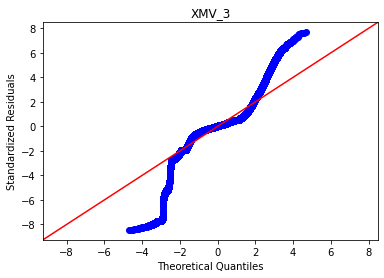

In [245]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_3')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

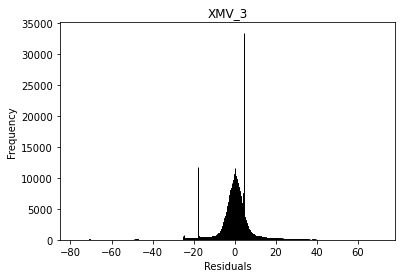

In [246]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_3')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [247]:
# xmv_4
res.tukey_hsd(df=data_prcs, res_var='xmv_4', xfac_var='faultNumber', anova_model='xmv_4 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,5.138844,5.007102,5.270586,195.500123,0.001
1,1,3,3.471783,3.340041,3.603525,132.079134,0.001
2,1,4,3.471935,3.340193,3.603678,132.084928,0.001
3,1,5,3.384495,3.252753,3.516237,128.758388,0.001
4,1,6,20.569395,20.437653,20.701137,782.533867,0.001
...,...,...,...,...,...,...,...
185,17,19,0.005387,-0.127176,0.137950,0.203688,0.900
186,17,20,0.003134,-0.129429,0.135697,0.118476,0.900
187,18,19,8.788940,8.656377,8.921503,332.292546,0.001
188,18,20,8.780419,8.647856,8.912982,331.970382,0.001


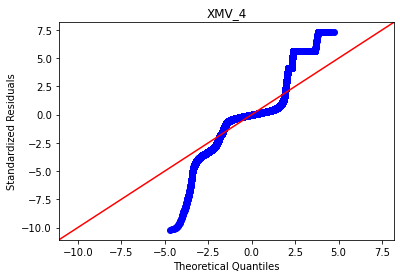

In [248]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_4')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

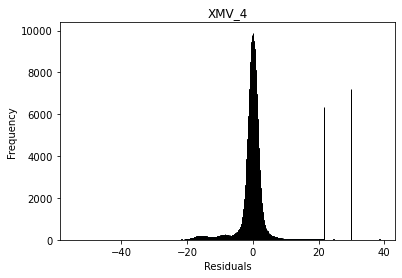

In [249]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_4')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [250]:
# xmv_5
res.tukey_hsd(df=data_prcs, res_var='xmv_5', xfac_var='faultNumber', anova_model='xmv_5 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.422453,0.152481,0.692424,7.842712,0.001
1,1,3,0.120639,-0.149333,0.390610,2.239624,0.900
2,1,4,0.121124,-0.148847,0.391096,2.248635,0.900
3,1,5,0.112842,-0.157130,0.382813,2.094875,0.900
4,1,6,8.002601,7.732629,8.272572,148.565972,0.001
...,...,...,...,...,...,...,...
185,17,19,0.006772,-0.264882,0.278426,0.124945,0.900
186,17,20,2.096933,1.825280,2.368587,38.687912,0.001
187,18,19,8.597822,8.326168,8.869476,158.627740,0.001
188,18,20,10.701527,10.429874,10.973181,197.440597,0.001


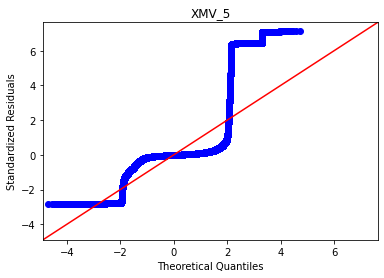

In [251]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_5')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

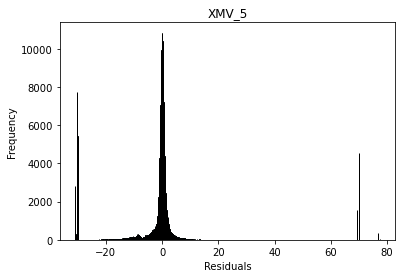

In [252]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_5')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [253]:
# xmv_6
res.tukey_hsd(df=data_prcs, res_var='xmv_6', xfac_var='faultNumber', anova_model='xmv_6 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,41.206260,41.032368,41.380151,1187.654910,0.001000
1,1,3,2.105038,1.931146,2.278929,60.671805,0.001000
2,1,4,2.094439,1.920548,2.268331,60.366344,0.001000
3,1,5,2.070010,1.896118,2.243902,59.662226,0.001000
4,1,6,24.493303,24.319411,24.667195,705.950791,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.007210,-0.167766,0.182185,0.206509,0.900000
186,17,20,0.130322,-0.044653,0.305297,3.732906,0.477692
187,18,19,11.930705,11.755730,12.105680,341.739886,0.001000
188,18,20,12.053817,11.878842,12.228793,345.266283,0.001000


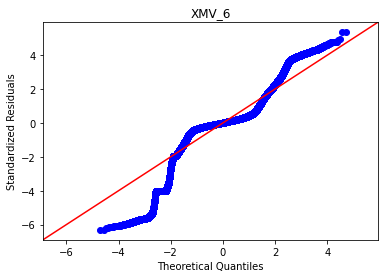

In [254]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_6')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

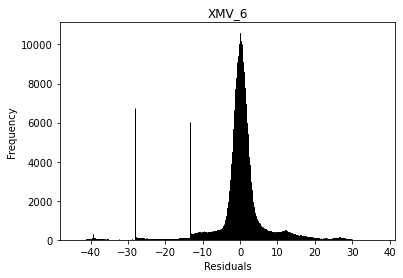

In [255]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_6')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [256]:
# xmv_7
res.tukey_hsd(df=data_prcs, res_var='xmv_7', xfac_var='faultNumber', anova_model='xmv_7 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.414320,0.341465,0.487174,28.502731,0.001000
1,1,3,0.023017,-0.049838,0.095871,1.583407,0.900000
2,1,4,0.022983,-0.049871,0.095837,1.581087,0.900000
3,1,5,0.045012,-0.027842,0.117866,3.096559,0.775472
4,1,6,0.734265,0.661411,0.807119,50.513083,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.029258,-0.044050,0.102566,2.000329,0.900000
186,17,20,0.050618,-0.022690,0.123926,3.460669,0.605522
187,18,19,0.802734,0.729426,0.876043,54.881434,0.001000
188,18,20,0.781375,0.708066,0.854683,53.421095,0.001000


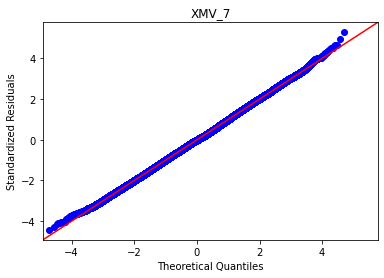

In [257]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_7')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

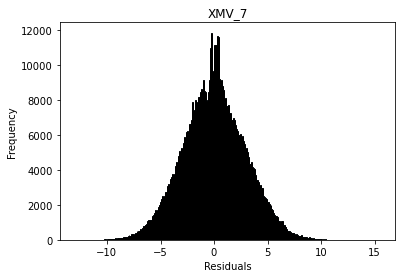

In [258]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_7')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [259]:
# xmv_8
res.tukey_hsd(df=data_prcs, res_var='xmv_8', xfac_var='faultNumber', anova_model='xmv_8 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.098938,0.040279,0.157598,8.453424,0.001000
1,1,3,0.136848,0.078189,0.195508,11.692497,0.001000
2,1,4,0.136806,0.078146,0.195465,11.688851,0.001000
3,1,5,0.073264,0.014605,0.131924,6.259788,0.001624
4,1,6,0.713814,0.655155,0.772474,60.989188,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.002179,-0.056846,0.061204,0.185043,0.900000
186,17,20,0.005080,-0.053945,0.064105,0.431377,0.900000
187,18,19,0.711316,0.652291,0.770341,60.399449,0.001000
188,18,20,0.708415,0.649390,0.767440,60.153114,0.001000


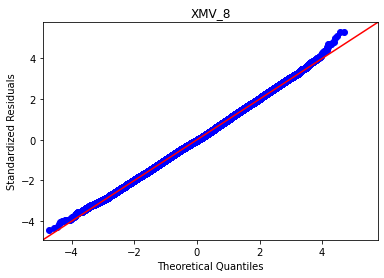

In [260]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_8')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

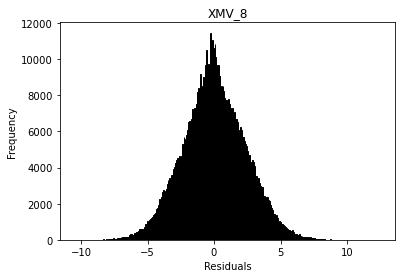

In [261]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_8')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [262]:
# xmv_9
res.tukey_hsd(df=data_prcs, res_var='xmv_9', xfac_var='faultNumber', anova_model='xmv_9 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,34.323573,33.986241,34.660905,509.966549,0.001000
1,1,3,15.931281,15.593950,16.268613,236.700900,0.001000
2,1,4,15.929563,15.592231,16.266895,236.675369,0.001000
3,1,5,16.611983,16.274651,16.949314,246.814499,0.001000
4,1,6,26.429807,26.092476,26.767139,392.683991,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.078644,-0.260789,0.418078,1.161233,0.900000
186,17,20,0.258685,-0.080749,0.598118,3.819637,0.432915
187,18,19,9.403758,9.064324,9.743191,138.852312,0.001000
188,18,20,9.583798,9.244364,9.923231,141.510716,0.001000


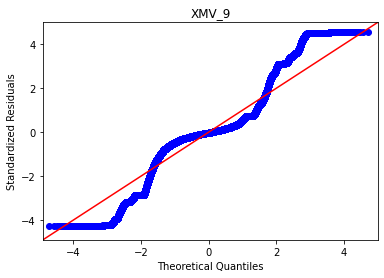

In [263]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_9')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

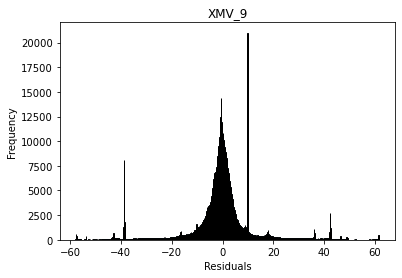

In [264]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_9')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [265]:
# xmv_10
res.tukey_hsd(df=data_prcs, res_var='xmv_10', xfac_var='faultNumber', anova_model='xmv_10 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.446231,0.199781,0.692680,9.074805,0.001000
1,1,3,0.194207,-0.052243,0.440657,3.949510,0.363086
2,1,4,3.736950,3.490500,3.983400,75.996794,0.001000
3,1,5,0.056649,-0.189801,0.303099,1.152050,0.900000
4,1,6,10.028814,9.782364,10.275264,203.951820,0.001000
...,...,...,...,...,...,...,...
185,17,19,2.813843,2.565857,3.061828,56.869615,0.001000
186,17,20,2.877180,2.629195,3.125166,58.149715,0.001000
187,18,19,3.269926,3.021941,3.517911,66.087361,0.001000
188,18,20,3.333264,3.085279,3.581249,67.367461,0.001000


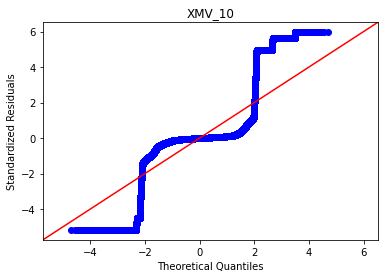

In [266]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_10')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

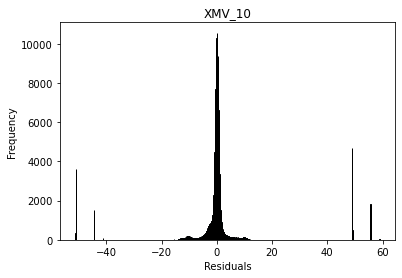

In [267]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_10')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [268]:
# xmv_11
res.tukey_hsd(df=data_prcs, res_var='xmv_11', xfac_var='faultNumber', anova_model='xmv_11 ~ C(faultNumber)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,1.063223,0.950156,1.176291,47.129544,0.001000
1,1,3,0.073247,-0.039821,0.186314,3.246802,0.705346
2,1,4,0.073058,-0.040010,0.186125,3.238441,0.709248
3,1,5,2.511574,2.398507,2.624642,111.330651,0.001000
4,1,6,9.517457,9.404389,9.630524,421.880656,0.001000
...,...,...,...,...,...,...,...
185,17,19,0.009501,-0.104271,0.123273,0.418543,0.900000
186,17,20,0.164684,0.050912,0.278456,7.254762,0.001000
187,18,19,3.329979,3.216207,3.443751,146.694112,0.001000
188,18,20,3.174796,3.061024,3.288568,139.857893,0.001000


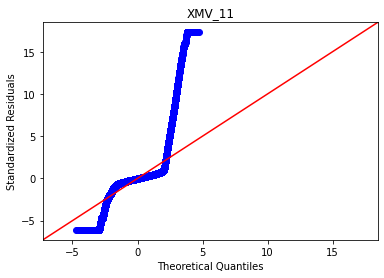

In [269]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.title('XMV_11')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

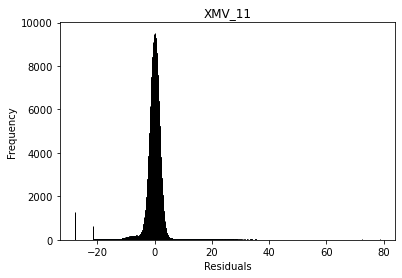

In [270]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title('XMV_11')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

## Bartlett’s test
use Bartlett’s test to check the Homogeneity of variances. Null hypothesis: samples from populations have equal variances.

In [271]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()

In [272]:
# xmeas_1
res.bartlett(df=data_prcs, res_var='xmeas_1', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),801286.3141
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [273]:
# xmeas_2
res.bartlett(df=data_prcs, res_var='xmeas_2', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),110537.3532
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [274]:
# xmeas_3
res.bartlett(df=data_prcs, res_var='xmeas_3', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),640934.22
1,Degrees of freedom (Df),19.00
2,p value,0.00


In [275]:
# xmeas_4
res.bartlett(df=data_prcs, res_var='xmeas_4', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.161601e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [276]:
# xmeas_5
res.bartlett(df=data_prcs, res_var='xmeas_5', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),130088.9928
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [277]:
# xmeas_6
res.bartlett(df=data_prcs, res_var='xmeas_6', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),254294.9521
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [278]:
# xmeas_7
res.bartlett(df=data_prcs, res_var='xmeas_7', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1597207.733
1,Degrees of freedom (Df),19.000
2,p value,0.000


In [279]:
# xmeas_8
res.bartlett(df=data_prcs, res_var='xmeas_8', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),733454.808
1,Degrees of freedom (Df),19.000
2,p value,0.000


In [280]:
# xmeas_9
res.bartlett(df=data_prcs, res_var='xmeas_9', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.445173e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [281]:
# xmeas_10
res.bartlett(df=data_prcs, res_var='xmeas_10', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),932846.5391
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [282]:
# xmeas_11
res.bartlett(df=data_prcs, res_var='xmeas_11', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.250220e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [283]:
# xmeas_12
res.bartlett(df=data_prcs, res_var='xmeas_12', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),21139.1347
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [284]:
# xmeas_13
res.bartlett(df=data_prcs, res_var='xmeas_13', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.546181e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [285]:
# xmeas_14
res.bartlett(df=data_prcs, res_var='xmeas_14', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),27529.3918
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [286]:
# xmeas_15
res.bartlett(df=data_prcs, res_var='xmeas_15', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),22128.2218
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [287]:
# xmeas_16
res.bartlett(df=data_prcs, res_var='xmeas_16', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.655028e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [288]:
# xmeas_17
res.bartlett(df=data_prcs, res_var='xmeas_17', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),17607.7603
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [289]:
# xmeas_18
res.bartlett(df=data_prcs, res_var='xmeas_18', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),892761.3182
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [290]:
# xmeas_19
res.bartlett(df=data_prcs, res_var='xmeas_19', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.070665e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [291]:
# xmeas_20
res.bartlett(df=data_prcs, res_var='xmeas_20', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.270321e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [292]:
# xmeas_21
res.bartlett(df=data_prcs, res_var='xmeas_21', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.930291e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [293]:
# xmeas_22
res.bartlett(df=data_prcs, res_var='xmeas_22', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1142744.979
1,Degrees of freedom (Df),19.000
2,p value,0.000


In [294]:
# xmeas_23
res.bartlett(df=data_prcs, res_var='xmeas_23', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1019446.418
1,Degrees of freedom (Df),19.000
2,p value,0.000


In [295]:
# xmeas_24
res.bartlett(df=data_prcs, res_var='xmeas_24', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),527408.4821
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [296]:
# xmeas_25
res.bartlett(df=data_prcs, res_var='xmeas_25', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),987404.6865
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [297]:
# xmeas_26
res.bartlett(df=data_prcs, res_var='xmeas_26', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),122980.3309
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [298]:
# xmeas_27
res.bartlett(df=data_prcs, res_var='xmeas_27', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.002332e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [299]:
# xmeas_28
res.bartlett(df=data_prcs, res_var='xmeas_28', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),907359.3326
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [300]:
# xmeas_29
res.bartlett(df=data_prcs, res_var='xmeas_29', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.249175e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [301]:
# xmeas_30
res.bartlett(df=data_prcs, res_var='xmeas_30', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),705763.5587
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [302]:
# xmeas_31
res.bartlett(df=data_prcs, res_var='xmeas_31', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.164103e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [303]:
# xmeas_32
res.bartlett(df=data_prcs, res_var='xmeas_32', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),243692.4517
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [304]:
# xmeas_33
res.bartlett(df=data_prcs, res_var='xmeas_33', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.178088e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [305]:
# xmeas_34
res.bartlett(df=data_prcs, res_var='xmeas_34', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.094646e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [306]:
# xmeas_35
res.bartlett(df=data_prcs, res_var='xmeas_35', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),993097.5731
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [307]:
# xmeas_36
res.bartlett(df=data_prcs, res_var='xmeas_36', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),644941.615
1,Degrees of freedom (Df),19.000
2,p value,0.000


In [308]:
# xmeas_37
res.bartlett(df=data_prcs, res_var='xmeas_37', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1979.7359
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [309]:
# xmeas_38
res.bartlett(df=data_prcs, res_var='xmeas_38', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.142110e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [310]:
# xmeas_39
res.bartlett(df=data_prcs, res_var='xmeas_39', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),56740.5592
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [311]:
# xmeas_40
res.bartlett(df=data_prcs, res_var='xmeas_40', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),47562.5676
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [312]:
# xmeas_41
res.bartlett(df=data_prcs, res_var='xmeas_41', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),54172.1351
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [313]:
# xmv_1
res.bartlett(df=data_prcs, res_var='xmv_1', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.976704e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [314]:
# xmv_2
res.bartlett(df=data_prcs, res_var='xmv_2', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),2.502154e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [315]:
# xmv_3
res.bartlett(df=data_prcs, res_var='xmv_3', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),828647.4246
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [316]:
# xmv_4
res.bartlett(df=data_prcs, res_var='xmv_4', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.538576e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [317]:
# xmv_5
res.bartlett(df=data_prcs, res_var='xmv_5', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),3.044955e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [318]:
# xmv_6
res.bartlett(df=data_prcs, res_var='xmv_6', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.315937e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [319]:
# xmv_7
res.bartlett(df=data_prcs, res_var='xmv_7', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),21139.2957
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [320]:
# xmv_8
res.bartlett(df=data_prcs, res_var='xmv_8', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),22129.3117
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [321]:
# xmv_9
res.bartlett(df=data_prcs, res_var='xmv_9', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.127189e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [322]:
# xmv_10
res.bartlett(df=data_prcs, res_var='xmv_10', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),3.006572e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


In [323]:
# xmv_11
res.bartlett(df=data_prcs, res_var='xmv_11', xfac_var='faultNumber')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.358346e+06
1,Degrees of freedom (Df),1.900000e+01
2,p value,0.000000e+00


## Levene’s test
can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.

In [324]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()

In [325]:
# xmeas_1
res.levene(df=data_prcs, res_var='xmeas_1', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),24569.7887
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [326]:
# xmeas_2
res.levene(df=data_prcs, res_var='xmeas_2', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),6069.7801
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [327]:
# xmeas_3
res.levene(df=data_prcs, res_var='xmeas_3', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),20836.8924
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [328]:
# xmeas_4
res.levene(df=data_prcs, res_var='xmeas_4', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),41182.9652
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [329]:
# xmeas_5
res.levene(df=data_prcs, res_var='xmeas_5', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9061.1442
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [330]:
# xmeas_6
res.levene(df=data_prcs, res_var='xmeas_6', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),15064.5844
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [331]:
# xmeas_7
res.levene(df=data_prcs, res_var='xmeas_7', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),29576.0839
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [332]:
# xmeas_8
res.levene(df=data_prcs, res_var='xmeas_8', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),23767.6298
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [333]:
# xmeas_9
res.levene(df=data_prcs, res_var='xmeas_9', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),50251.1181
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [334]:
# xmeas_10
res.levene(df=data_prcs, res_var='xmeas_10', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),14297.9495
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [335]:
# xmeas_11
res.levene(df=data_prcs, res_var='xmeas_11', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),26053.8625
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [336]:
# xmeas_12
res.levene(df=data_prcs, res_var='xmeas_12', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1488.9592
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [337]:
# xmeas_13
res.levene(df=data_prcs, res_var='xmeas_13', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),30557.5988
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [338]:
# xmeas_14
res.levene(df=data_prcs, res_var='xmeas_14', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1305.7714
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [339]:
# xmeas_15
res.levene(df=data_prcs, res_var='xmeas_15', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1429.6683
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [340]:
# xmeas_16
res.levene(df=data_prcs, res_var='xmeas_16', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),24016.3153
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [341]:
# xmeas_17
res.levene(df=data_prcs, res_var='xmeas_17', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),808.2347
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [342]:
# xmeas_18
res.levene(df=data_prcs, res_var='xmeas_18', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),23550.095
1,Degrees of freedom (Df),19.000
2,p value,0.000


In [343]:
# xmeas_19
res.levene(df=data_prcs, res_var='xmeas_19', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),23343.2878
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [344]:
# xmeas_20
res.levene(df=data_prcs, res_var='xmeas_20', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),35166.1079
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [345]:
# xmeas_21
res.levene(df=data_prcs, res_var='xmeas_21', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),35670.0242
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [346]:
# xmeas_22
res.levene(df=data_prcs, res_var='xmeas_22', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),25594.0342
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [347]:
# xmeas_23
res.levene(df=data_prcs, res_var='xmeas_23', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),20337.4705
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [348]:
# xmeas_24
res.levene(df=data_prcs, res_var='xmeas_24', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),21997.0436
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [349]:
# xmeas_25
res.levene(df=data_prcs, res_var='xmeas_25', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),15378.1833
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [350]:
# xmeas_26
res.levene(df=data_prcs, res_var='xmeas_26', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),7315.3498
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [351]:
# xmeas_27
res.levene(df=data_prcs, res_var='xmeas_27', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),38156.1471
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [352]:
# xmeas_28
res.levene(df=data_prcs, res_var='xmeas_28', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),18972.7256
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [353]:
# xmeas_29
res.levene(df=data_prcs, res_var='xmeas_29', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),21928.0173
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [354]:
# xmeas_30
res.levene(df=data_prcs, res_var='xmeas_30', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),23128.9155
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [355]:
# xmeas_31
res.levene(df=data_prcs, res_var='xmeas_31', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),14536.148
1,Degrees of freedom (Df),19.000
2,p value,0.000


In [356]:
# xmeas_32
res.levene(df=data_prcs, res_var='xmeas_32', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),13626.3426
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [357]:
# xmeas_33
res.levene(df=data_prcs, res_var='xmeas_33', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),41032.4125
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [358]:
# xmeas_34
res.levene(df=data_prcs, res_var='xmeas_34', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),19626.0161
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [359]:
# xmeas_35
res.levene(df=data_prcs, res_var='xmeas_35', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),24304.6599
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [360]:
# xmeas_36
res.levene(df=data_prcs, res_var='xmeas_36', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),18944.3093
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [361]:
# xmeas_37
res.levene(df=data_prcs, res_var='xmeas_37', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),91.2962
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [362]:
# xmeas_38
res.levene(df=data_prcs, res_var='xmeas_38', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),27876.5233
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [363]:
# xmeas_39
res.levene(df=data_prcs, res_var='xmeas_39', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),2624.3634
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [364]:
# xmeas_40
res.levene(df=data_prcs, res_var='xmeas_40', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),2464.9071
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [365]:
# xmeas_41
res.levene(df=data_prcs, res_var='xmeas_41', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),2775.6356
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [366]:
# xmv_1
res.levene(df=data_prcs, res_var='xmv_1', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),13578.3259
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [367]:
# xmv_2
res.levene(df=data_prcs, res_var='xmv_2', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),18991.849
1,Degrees of freedom (Df),19.000
2,p value,0.000


In [368]:
# xmv_3
res.levene(df=data_prcs, res_var='xmv_3', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),16769.3475
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [369]:
# xmv_4
res.levene(df=data_prcs, res_var='xmv_4', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),36163.7243
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [370]:
# xmv_5
res.levene(df=data_prcs, res_var='xmv_5', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),23332.5693
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [371]:
# xmv_6
res.levene(df=data_prcs, res_var='xmv_6', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),22185.9159
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [372]:
# xmv_7
res.levene(df=data_prcs, res_var='xmv_7', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1488.8428
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [373]:
# xmv_8
res.levene(df=data_prcs, res_var='xmv_8', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1429.9018
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [374]:
# xmv_9
res.levene(df=data_prcs, res_var='xmv_9', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),22165.6423
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [375]:
# xmv_10
res.levene(df=data_prcs, res_var='xmv_10', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),39119.2115
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [376]:
# xmv_11
res.levene(df=data_prcs, res_var='xmv_11', xfac_var='faultNumber')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17629.5824
1,Degrees of freedom (Df),19.0000
2,p value,0.0000
